# COGS 108 - California Warming Predictions

## Overview 

For this project, our goal was to confirm if there is a correlation between pollutants in the air and surface temperatures using a correlation matrix. This would suggest there is influence between the two climate factors and allows us to predict future average temperatures. To conduct this prediction, we used a linear regression model from the data entries between 2000 and 2014 as a training set and 2015 entries for the testing set. Our null hypothesis was that there is no relationship between temperature and the pollutants SO2, NO2, CO, O3 and our alternative hypothesis is that there is. We conclude after our analysis that due to our RMSE being a reasonable value under 10 degrees F, that we reject the null hypothesis in favor of the alternative hypothesis.

## Names

- Hyang-Soon Doo
- Jackie Kwok
- Alexander Tyler
- Jerric Jiang
- Vanessa Van Steenbergen

<a id='research_question'></a>
## Research Question

What is the trajectory of future air pollution and temperatures in California counties based on past trends of California climate?

## Background & Prior Work

With climate change well on the rise and becoming a bigger concern by the day, it has become increasingly important to understand the correlations between a variety of factors that contribute to the climate crisis. Pollution and greenhouse gas emissions are some of the more concerning contributors that are both measurable and a direct result of human production and consumerism. Pollutants are also poorly managed as a result of privatization of manufacturing across the nation, paving the way for today's lack of control on pollution in the United States. This privatization makes it difficult for the government to hold manufacturing companies accountable for their pollutant outputs. However, with increasing evidence of positive correlations for pollution and climate, it is becoming increasingly apparent that immediate federal action must take place in order to prevent further harm to the climate. 

Air pollution negatively impacts the climate as well as imposing negative health effects. Smog, or O3, is an example of a 'ground-level ozone' which is most visible in the air. It is is most prevalent in summer months, when the sun's rays are the strongest and interacts with combusting fossil fuels, which come from fuel running cars or factories. Nitrous dioxide, or NO2, also results from interactions with these fossil emissions and deteriorates the atmosphere's natural ozone layer. Other greenhouse gases also contribute to climate change, prompting abnormally warmer temperatures by trapping heat in the lower atmosphere. 

Given this correlation between pollutants such as O3 and high temperatures, it is suggested that with increasing fossil fuel emissions, temperature averages will continue to steadily increase. These increasing average temperatures will also influence the amount of pollutants in the atmosphere to increase further as the increased temperatures fuel the development of these pollutants. Assuming there is this correlation between air pollutants and surface temperature, we plan to look at these pollutants and temperatures at the local county level in the state of California over a length of time so that we can make a prediction for the trajectory of future temperatures.  

#### References:

1. https://www.nrdc.org/stories/air-pollution-everything-you-need-know#:~:text=%E2%80%9CBurning%20fossil%20fuels%20releases%20gases,earth's%20temperature%2C%E2%80%9D%20Walke%20says.

2. https://www.epa.gov/no2-pollution

3. https://www.climatecentral.org/news/climate-change-is-threatening-air-quality-across-the-country-2019

## Hypothesis

Since temperatures have increased more rapidly in recent years compared to in the past, we assume that this is due to human environmental impacts.

If the upward trend in average temperatures continues and is influenced by pollutants in the air, then we expect the trajectory to continue to increase as pollutants continue to contaminate the air. 

- Null: Pollutants do not have an effect on temperature in California.
- Alternative: Pollutants do have an effect on temperature in California.

## Datasets

1. Dataset Name: U.S Pollution Data
    - Link to the dataset: https://www.kaggle.com/sogun3/uspollution
    - Number of observations: 35,606
    - This dataset is sourced from the U.S. EPA and cleaned by a user in Kaggle who extracted the data from the U.S. EPA dataset of the daily amount for the four major pollutants: Nitrogen Dioxide, Sulphur Dioxide, Carbon Monoxide and Ozone. Specifically, this dataset observes the US daily pollutant AQI's between the years 2000 and 2016 for a several individual state counties.
    
    
2. Dataset Name: Climate Change: Earth Surface Temperature Data
    - Link to the dataset: https://www.ncdc.noaa.gov/cag/county/mapping/4/tavg/201902/1/value
    - Number of observations: 87,754
    - This dataset was collected by the NOAA's National Centers for Environmental Information and contains information regarding the monthly average temperatures at the county level for the state of California. Data entries begin January 1895 to January 2021. 

We plan on combining these two datasets to see if there is a relationship between the amount of pollution produced in California and the effects it has on California's Climate in regards to land temperature.

## Setup

In [95]:
# import working with data libraries
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import patsy

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## uncomment to view the isarithmic graph 
# import plotly.express as px 
# import json
#from urllib.request import urlopen
##

from IPython.display import Image

# import seaborn
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

## Data Cleaning

### Cleaning Pollution Data

We first read the pollution dataset and checked what column values it contained. We noticed that there were a few columns that we wouldn't need in our analysis such as `State Code`, `Country Code`, `Address` as we'll only be using the data based on county names within California. We also will not need the 1st max hours/value, as these values inform us of the maximum gas amount from the 1st hour of the day. We will be using only the average values so the 1st max hour/value is not relevant to our particular analysis. Thus, we dropped these columns to reduce cluttering the dataframe. Then, we wanted to only show data from the state of California, so we extracted all rows that had a `State` value as `California` and reset the index so the observations started from 0. 

Next, we noticed that the date column was a string object. We decided that it would be beneficial to have the column entries as a `datetime` object, and thus, we converted the `Date Local` column. Finally, we noticed that there were multiple values for the same date in certain counties and cities. We decided that it would suffice to find the average for multiple observations that were recorded on the same day for each county. We chose to look at county observations rather than individual city observations because we felt that the counties would have a better overall representation for groups of cities with regional similarities.

In [96]:
# Read in the pollution dataset
poll = pd.read_csv('../pollution_us_2000_2016.csv')

In [97]:
poll

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,...,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [98]:
# Remove the columns that we don't need
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address', 'NO2 1st Max Value', 
                  'NO2 1st Max Hour', 'O3 1st Max Value', 'O3 1st Max Hour', 
                  'SO2 1st Max Value', 'SO2 1st Max Hour', 'CO 1st Max Value', 'CO 1st Max Hour'], axis=1)

In [99]:
poll

,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 AQI,O3 Units,O3 Mean,O3 AQI,SO2 Units,SO2 Mean,SO2 AQI,CO Units,CO Mean,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,46,Parts per million,0.022500,34,Parts per billion,3.000000,13.0,Parts per million,1.145833,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,46,Parts per million,0.022500,34,Parts per billion,3.000000,13.0,Parts per million,0.878947,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,46,Parts per million,0.022500,34,Parts per billion,2.975000,NaN,Parts per million,1.145833,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,46,Parts per million,0.022500,34,Parts per billion,2.975000,NaN,Parts per million,0.878947,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,34,Parts per million,0.013375,27,Parts per billion,1.958333,4.0,Parts per million,0.850000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,1.083333,1,Parts per million,0.043917,44,Parts per billion,0.000000,NaN,Parts per million,0.091667,1.0
1746657,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1,Parts per million,0.045263,44,Parts per billion,-0.022727,0.0,Parts per million,0.067714,NaN
1746658,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1,Parts per million,0.045263,44,Parts per billion,-0.022727,0.0,Parts per million,0.100000,1.0
1746659,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1,Parts per million,0.045263,44,Parts per billion,0.000000,NaN,Parts per million,0.067714,NaN


In [100]:
# Find the columns and rows where the state is CA
pollCali = poll.loc[poll['State'] == 'California']
# clear the index
pollCali = pollCali.reset_index(drop = True)
#change string date to datetime objects
pollCali['Date Local'] = pd.to_datetime(pollCali['Date Local'],format='%Y-%m-%d')


In [101]:
pollCali

,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 AQI,O3 Units,O3 Mean,O3 AQI,SO2 Units,SO2 Mean,SO2 AQI,CO Units,CO Mean,CO AQI
0,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,25,Parts per million,0.015542,25,Parts per billion,0.636364,3.0,Parts per million,0.556522,NaN
1,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,25,Parts per million,0.015542,25,Parts per billion,0.636364,3.0,Parts per million,0.572222,9.0
2,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,25,Parts per million,0.015542,25,Parts per billion,0.600000,NaN,Parts per million,0.556522,NaN
3,California,Contra Costa,Concord,2000-01-01,Parts per billion,14.782609,25,Parts per million,0.015542,25,Parts per billion,0.600000,NaN,Parts per million,0.572222,9.0
4,California,Contra Costa,Concord,2000-01-02,Parts per billion,16.043478,28,Parts per million,0.015292,27,Parts per billion,1.000000,3.0,Parts per million,0.578261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576137,California,Solano,Vallejo,2016-04-29,Parts per billion,3.643478,8,Parts per million,0.032417,35,Parts per billion,0.457143,NaN,Parts per million,0.262500,3.0
576138,California,Solano,Vallejo,2016-04-30,Parts per billion,4.160870,12,Parts per million,0.038053,38,Parts per billion,0.468182,0.0,Parts per million,0.247826,NaN
576139,California,Solano,Vallejo,2016-04-30,Parts per billion,4.160870,12,Parts per million,0.038053,38,Parts per billion,0.468182,0.0,Parts per million,0.245833,3.0
576140,California,Solano,Vallejo,2016-04-30,Parts per billion,4.160870,12,Parts per million,0.038053,38,Parts per billion,0.442857,NaN,Parts per million,0.247826,NaN


Let's standardize the units for all the passes so they are Parts per million.

In [102]:
print('NO2 units: ', pollCali['NO2 Units'].unique())
print('O3 units: ', pollCali['O3 Units'].unique())
print('SO2 units: ', pollCali['SO2 Units'].unique())
print('CO units: ', pollCali['CO Units'].unique())

NO2 units:  ['Parts per billion']
O3 units:  ['Parts per million']
SO2 units:  ['Parts per billion']
CO units:  ['Parts per million']


In [103]:
# only need to standardize NO2 and SO2 
def ppb_to_ppm(level):
    return level/1000;

In [104]:
pollCali['NO2 Mean'] = pollCali['NO2 Mean'].apply(ppb_to_ppm)
pollCali['SO2 Mean'] = pollCali['SO2 Mean'].apply(ppb_to_ppm)

In [105]:
pollCali

,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 AQI,O3 Units,O3 Mean,O3 AQI,SO2 Units,SO2 Mean,SO2 AQI,CO Units,CO Mean,CO AQI
0,California,Contra Costa,Concord,2000-01-01,Parts per billion,0.014783,25,Parts per million,0.015542,25,Parts per billion,0.000636,3.0,Parts per million,0.556522,NaN
1,California,Contra Costa,Concord,2000-01-01,Parts per billion,0.014783,25,Parts per million,0.015542,25,Parts per billion,0.000636,3.0,Parts per million,0.572222,9.0
2,California,Contra Costa,Concord,2000-01-01,Parts per billion,0.014783,25,Parts per million,0.015542,25,Parts per billion,0.000600,NaN,Parts per million,0.556522,NaN
3,California,Contra Costa,Concord,2000-01-01,Parts per billion,0.014783,25,Parts per million,0.015542,25,Parts per billion,0.000600,NaN,Parts per million,0.572222,9.0
4,California,Contra Costa,Concord,2000-01-02,Parts per billion,0.016043,28,Parts per million,0.015292,27,Parts per billion,0.001000,3.0,Parts per million,0.578261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576137,California,Solano,Vallejo,2016-04-29,Parts per billion,0.003643,8,Parts per million,0.032417,35,Parts per billion,0.000457,NaN,Parts per million,0.262500,3.0
576138,California,Solano,Vallejo,2016-04-30,Parts per billion,0.004161,12,Parts per million,0.038053,38,Parts per billion,0.000468,0.0,Parts per million,0.247826,NaN
576139,California,Solano,Vallejo,2016-04-30,Parts per billion,0.004161,12,Parts per million,0.038053,38,Parts per billion,0.000468,0.0,Parts per million,0.245833,3.0
576140,California,Solano,Vallejo,2016-04-30,Parts per billion,0.004161,12,Parts per million,0.038053,38,Parts per billion,0.000443,NaN,Parts per million,0.247826,NaN


Now all the gas units are standardized to PPM, we will remove the units column for each.

In [106]:
pollCali = pollCali.drop(['NO2 Units', 'SO2 Units', 'CO Units', 'O3 Units'], axis = 1)

There are duplicate values for the same day, so we will get the average of the rows with the same date.

In [107]:
# get the mean of duplicate values of same county
pollCali = pollCali.groupby(['County', 'Date Local']).mean()

Now we will add a separate column named 'Year' so we can group the data by yearly values.

In [108]:
pollCali.reset_index(inplace=True)
pollCali['Year'] = pd.to_datetime(pollCali['Date Local']).dt.year

In [109]:
# value counts for each year
pollCali['Year'].value_counts()

2008    5423
2009    5291
2015    4990
2002    4971
2010    4929
2014    4902
2003    4896
2007    4895
2013    4877
2012    4814
2001    4702
2011    4674
2000    4656
2006    4369
2004    4322
2005    4271
2016     927
Name: Year, dtype: int64

We are checking to see how many values we have for each year. Here, we can see that most years have over 4,000 entries but the year 2016 has less than 1,000 entries meaning that the data incomplete. We confirmed this by looking at the entries for the  for 2016 (below) and it only included entries until the month of April, not for the entire year. Thus, to ensure we are able to capture the whole picture, we will remove 2016 from our dataset.

In [110]:
pollCali[(pollCali['Year'] == 2016)]['Date Local'].dt.month.unique()

array([1, 2, 3, 4])

We will remove 2016 from our pollution dataset as it contains incomplete data for the year 2016. 

In [111]:
pollCali = pollCali[pollCali['Year'] < 2016]

In [112]:
# making sure that there are only years 2000-2015
pollCali['Year'].unique()

array([2001, 2002, 2003, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2000, 2004, 2005, 2006])

We will now check if there are any counties that also have missing data from the year 2000-2015

In [113]:
pollCali['County'].value_counts()

Contra Costa      5844
Los Angeles       5844
Santa Barbara     5844
Solano            5801
San Bernardino    5790
San Diego         5592
Sacramento        5574
Imperial          5517
Orange            5404
Riverside         5361
Alameda           3416
Santa Cruz        3340
Fresno            3271
San Francisco     3264
Humboldt          3099
Santa Clara       2503
Ventura           1409
Kern               109
Name: County, dtype: int64

We can see that each county has differing number of records for pollutant measurements. Contra Costa, Santa Barbara, and Los Angeles County having the most, 5844 entries, while Kern County only has 109. We will take a look at the counties with less than 5000 entries.

In [114]:
def howManyYears(df):
    di = {}
    for county in df['County'].unique():
        di[county] = df[df['County'] == county]['Year'].unique().tolist()
    return di

In [115]:
less_than_normal = ['Alameda', 'Santa Cruz', 'Fresno', 'San Francisco', 'Humboldt', 'Santa Clara', 'Ventura', 'Kern']
poll_df_lessthan = pollCali[pollCali['County'].isin(less_than_normal)]
result = howManyYears(poll_df_lessthan)
result

{'Alameda': [2001,
  2002,
  2003,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015],
 'Fresno': [2003, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
 'Humboldt': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
 'Kern': [2000, 2001],
 'San Francisco': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008],
 'Santa Clara': [2009, 2010, 2011, 2012, 2013, 2014, 2015],
 'Santa Cruz': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
 'Ventura': [2000, 2001, 2002, 2003, 2004]}

We notice that Kern County only has 2 years worth of data. Alameda had 3416 entries, short 1584 from 5000 entries but it's only missing a year's worth (it's only missing data for 2000). Fresno, Humboldt, Santa Clara County are all missing data from the earlier years and San Francisco, Santa Crux, and Ventura County are missing data for the later years.

In [116]:
pollCali = pollCali[~pollCali['County'].isin(less_than_normal)]

We decided to remove counties that had missing data for the years 2000-2015. The following pollCali dataframe is the cleaned pollution dataframe that we will be using for our analysis. It contains 10 counties. 

In [117]:
pollCali

,County,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Year
3533,Contra Costa,2000-01-01,0.013630,21.75,0.015615,21.00,0.001402,4.00,0.615761,10.50,2000
3534,Contra Costa,2000-01-02,0.012053,20.00,0.018719,24.75,0.002044,6.50,0.465257,7.25,2000
3535,Contra Costa,2000-01-03,0.021324,35.25,0.007729,14.00,0.002451,9.25,0.882036,15.50,2000
3536,Contra Costa,2000-01-04,0.024756,38.00,0.007476,12.00,0.002458,9.25,1.031797,17.75,2000
3537,Contra Costa,2000-01-05,0.015565,26.50,0.015406,22.25,0.001082,3.00,0.696122,12.00,2000
...,...,...,...,...,...,...,...,...,...,...,...
76374,Solano,2015-12-27,0.014109,29.00,0.013083,19.00,0.000883,1.00,0.757971,17.00,2015
76375,Solano,2015-12-28,0.015735,30.00,0.010250,22.00,0.000842,3.00,0.706703,18.00,2015
76376,Solano,2015-12-29,0.021213,31.00,0.007083,19.00,0.001206,1.00,1.032609,22.00,2015
76377,Solano,2015-12-30,0.018857,25.00,0.004875,12.00,0.001394,3.00,0.900000,15.00,2015


### Cleaning Temperature Dataset

To clean the second dataset, we dropped columns that were not necessary for the understanding of our data or for the analysis itself. Specifically we got rid of the columns: [`Location ID`, `Rank`] since they are not relevant to our understanding or analysis. We then reformatted the `Date` column to be more reader friendly - in a MM/YYYY format. We checked for any null rows, which there were none. We also checked for the number of unique counties we have data for, which turned out to be 58 counties. We have a total of 87,754 entries ranging from the year 1895, up to the most recent month January of 2021.

In [118]:
#read in csv
df = pd.read_csv('4-tavg.csv', skiprows = 3)

#looking at first 10 rows
df.head()

,Location ID,Location,Date,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,CA-001,Alameda County,189501,45.2,32,-1.2,46.4
1,CA-001,Alameda County,189502,50.0,72,0.5,49.5
2,CA-001,Alameda County,189503,50.6,35,-1.3,51.9
3,CA-001,Alameda County,189504,54.5,42,-0.7,55.2
4,CA-001,Alameda County,189505,59.3,48,-0.5,59.8


In [119]:
# drop unnecessary columns
df = df.drop(columns = ['Location ID', 'Rank'])

#checking for any null values
df.isnull().values.any()

# Check how many total counties are in the dataframe
len(df.Location.unique())

58

There are 58 unique counties. This perfectly matches up with the number of counties in California so based on this number we can assume that we have data representative of all the counties in California.

Now we will check the data types of the columns to make sure they are the correct data types that we need for our analysis.

In [120]:
# Check datatypes of columns
df.dtypes

Location                            object
Date                                 int64
Value                              float64
Anomaly (1901-2000 base period)    float64
1901-2000 Mean                     float64
dtype: object

We notice that the date is an integer with no separation for month, year, and date. We will standardize the data such that it will only represent the year and month.

In [121]:
#date function to reformat date column
def standardize_date(date):
    date = str(date)
    return date[4:6] + "/" + date[:4]

In [122]:
#apply transformation to date column
df['Date'] = df['Date'].apply(standardize_date)

In [123]:
df

,Location,Date,Value,Anomaly (1901-2000 base period),1901-2000 Mean
0,Alameda County,01/1895,45.2,-1.2,46.4
1,Alameda County,02/1895,50.0,0.5,49.5
2,Alameda County,03/1895,50.6,-1.3,51.9
3,Alameda County,04/1895,54.5,-0.7,55.2
4,Alameda County,05/1895,59.3,-0.5,59.8
...,...,...,...,...,...
87749,Yuba County,09/2020,76.3,5.9,70.4
87750,Yuba County,10/2020,69.1,6.9,62.2
87751,Yuba County,11/2020,52.3,0.3,52.0
87752,Yuba County,12/2020,48.3,2.9,45.4


Our temperature dataset includes the columns `Anomaly (1901-2000 base period)` and `1901-2000 Mean`, which we were, at first, unsure what exactly the mean column was refering to in terms of the data holistically. We predicted that this mean was the average for each month across the years 1901-2000. We decided to narrow the data to one county and then to a single month entry across the years 1901-2000. 

After narrowing the data to a single entry region and month, we were able to confirm that the 1901-2000 mean is indeed the average temperature of a month from a span of 1901-2021 with the average anomaly subtracted from the average temperature. We won't be needing this for our analysis so we will remove these columns. Let's also rename the columns and create a new column just for the year. This will help group the data into years so that it's easier to plot and view the trend.

In [124]:
df = df.drop(columns=['Anomaly (1901-2000 base period)', '1901-2000 Mean'])

In [125]:
# rename the table so that the columns have a better label
df = df.rename(columns={'Location': 'County', 'Value': 'Temperature'})

In [126]:
#creating a separate column for year
df['Year'] = pd.to_datetime(df['Date']).dt.year

Text(0.5, 1.0, 'Mean Temperatures 1895-2021')

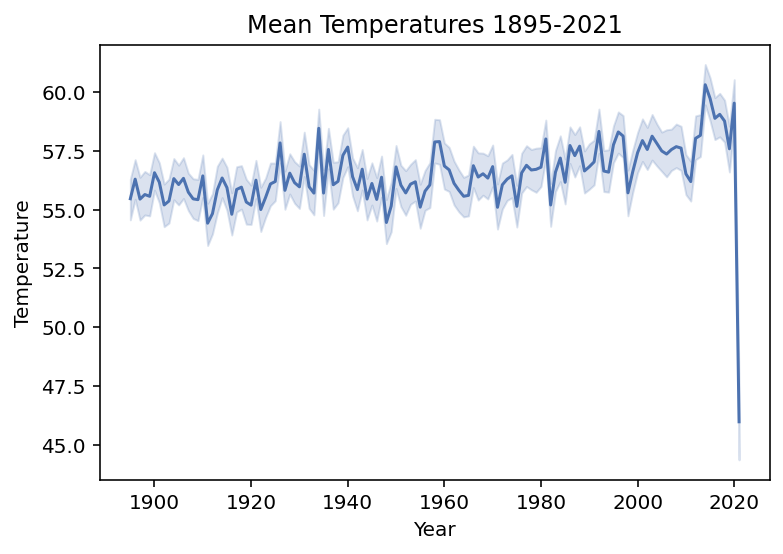

In [127]:
# Line plot for the average temperatures for each year from 1895-2021
ax = sns.lineplot(x="Year", y="Temperature", data=df)
ax.set_title('Mean Temperatures 1895-2021')

The following line plot showed us that there is a general trend where the temperature is increasing until 2020. We will examine what is happening from 2020 to see the reason for this sudden drop.

In [128]:
df[df['Year'] > 2020].groupby(['Date']).size()

Date
01/2021    58
dtype: int64

We see that for that for the 58 counties in California, we have data for only one month in 2021. This explains the sudden drop in the line plot as the temperatures in January are fairly cold, and if the graph is plotting the average of years with the average for 2021 being solely based on the January temperatures, then it's not surprising as to why there is that drop. Thus, we will remove 2021 from our dataset so that we will only be using complete data for each year.

In [129]:
# removing 2021 from the temperature dataset
df = df[df['Year'] < 2021]
df["Year"].unique()

array([1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905,
       1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916,
       1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

Now that we removed 2021 and made sure that we only had values from 1895-2020, we will now group the data by `Year` and `County` so we can calculate the average of each county for a specific year. This is to help us narrow down our dataset to contain values that are meaningful and concise.

In [130]:
# now grouping by year and county and getting the mean
df_avg = df.groupby(['Year', 'County'], as_index = False).mean()
df_avg 

,Year,County,Temperature
0,1895,Alameda County,56.641667
1,1895,Alpine County,41.850000
2,1895,Amador County,56.116667
3,1895,Butte County,58.941667
4,1895,Calaveras County,56.241667
...,...,...,...
7303,2020,Tulare County,56.000000
7304,2020,Tuolumne County,52.633333
7305,2020,Ventura County,59.350000
7306,2020,Yolo County,64.125000


# Data Analysis & Results

## Pollution and Temperature EDA

Now, let's combine our pollution and temperature data into a single dataset to generalize the shape of our data and the relationship between pollution and temperature. Since our two datasets do not exactly match up, we have to strip all the dates that do not correlate between the two datasets. We will use the average yearly temperature for each county, in addition to the average ppm/AQI values of the pollutants. Our datasets both contain data for dates between the years 2000 and 2015, so we will have to strip dates outside of that range. In addition, our pollution data set only contain 10 counties, so we will only be verifying if there is still a visible upward temperature trend for this smaller timeframe.

In [131]:
# get the yearly average of values of pollution within each county
avg_yr_poll = pollCali.groupby(['Year', 'County'], as_index = False).mean()

In [132]:
# extract only the temperature data from 2000-2015
temp_2000_15 = df_avg[(df_avg.Year >= 2000) & (df_avg.Year <= 2015)]

Let's set up the columns for which we will merge the two datasets on: `County` and `Year`. We will make sure they are the same string types and are identical in each dataframe, then merge. 

In [133]:
# Temperature 
# Standardize 'County' column in temp_2000_16 so it has same county names as avg_yr_poll
temp_2000_15['County']=temp_2000_15['County'].apply(lambda s:s.replace(' County', ''))
temp_2000_15['County']=temp_2000_15['County'].apply(lambda s:s.upper())
temp_2000_15['County']=temp_2000_15['County'].apply(lambda s:s.strip())
# Convert 'County' column types to str 
temp_2000_15['County'] = temp_2000_15['County'].astype(str)

In [134]:
# Pollution
# Standardize 'County' column in avg_yr_poll so it has same county names as temp_2000_16
avg_yr_poll['County']=avg_yr_poll['County'].apply(lambda s:s.upper())
avg_yr_poll['County']=avg_yr_poll['County'].apply(lambda s:s.strip())
# Convert 'County' column types to str 
avg_yr_poll['County'] = avg_yr_poll['County'].astype(str)

In [135]:
# counties in pollution data that we want to extract from temperature datatset
keep_counties = avg_yr_poll['County'].unique()

In [136]:
# remove the counties that are not in the pollution dataset from the temperature dataset
temp_2000_15 = temp_2000_15[temp_2000_15['County'].isin(keep_counties)]

In [137]:
# merge the two dataframes
new_df = pd.merge(temp_2000_15,avg_yr_poll, how = 'left', left_on = ['County', 'Year'], right_on = ['County', 'Year'])
new_df.sort_values(by='County', inplace=True)
new_df

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,2000,CONTRA COSTA,59.891667,0.013313,22.603370,0.021606,28.677368,0.001711,5.872040,0.525496,8.272769
50,2005,CONTRA COSTA,60.116667,0.010373,18.278539,0.021949,28.370091,0.001755,6.358676,0.365533,5.548174
60,2006,CONTRA COSTA,59.825000,0.010575,19.006164,0.024374,31.915068,0.001719,6.699315,0.383510,5.725342
30,2003,CONTRA COSTA,60.458333,0.011827,20.749315,0.023603,30.892055,0.001672,6.528037,0.456008,7.065114
70,2007,CONTRA COSTA,59.883333,0.010036,18.094064,0.023668,29.785845,0.001239,5.656393,0.332520,4.903196
...,...,...,...,...,...,...,...,...,...,...,...
29,2002,SOLANO,60.883333,0.012969,22.005495,0.021894,27.659341,0.001280,4.277473,0.558674,10.299451
19,2001,SOLANO,61.675000,0.012922,22.097493,0.021029,25.883008,0.000943,3.793872,0.529055,9.791086
9,2000,SOLANO,60.791667,0.013327,22.659341,0.017041,21.123626,0.001507,4.609890,0.637848,11.950549
139,2013,SOLANO,61.533333,0.009843,18.693151,0.022300,30.194521,0.000593,0.895890,0.395995,6.621918


We will also define a separate column to hold the region number for each county. This will help us group the counties by region and aid our analysis because we can easily see which counties are near one another based on their region number.

In [138]:
regions = {1: ['BUTTE', 'COLUSA', 'EL DORADO', 'GLENN', 'LASSEN', 'MODOC', 'NEVADA',
              'PLACER', 'PLUMAS', 'SACRAMENTO', 'SHASTA', 'SIERRA', 'SISKIYOU', 'TEHAMA', 
              'YOLO', 'YUBA', 'SUTTER'],
          2: ['DEL NORTE', 'HUMBOLDT', 'LAKE', 'MENDOCINO', 'NAPA', 'SONOMA', 'TRINITY'], 
          3: ['ALAMEDA', 'CONTRA COSTA', 'MARIN', 'SAN FRANCISCO', 'SAN MATEO', 'SANTA CLARA', 'SOLANO'], 
          4: ['ALPINE', 'AMADOR', 'CALAVERAS', 'MADERA', 'MARIPOSA', 'MERCED', 'MONO',
              'SAN JOAQUIN', 'STANISLAUS', 'TUOLUMNE'],
          5: ['MONTEREY', 'SAN BENITO', 'SAN LUIS OBISPO', 'SANTA BARBARA', 'SANTA CRUZ', 'VENTURA'],
          6: ['FRESNO', 'INYO', 'KERN', 'KINGS', 'TULARE'], 
          7: ['RIVERSIDE', 'SAN BERNARDINO'],
          8: ['LOS ANGELES'], 
          9: ['ORANGE'],
          10: ['IMPERIAL', 'SAN DIEGO']}

In [139]:
def locateRegion(county):
    for key, value in regions.items():
        if county in value:
            return key

In [140]:
new_df['Region'] = new_df['County'].apply(locateRegion)

Now, we have a new dataframe, `new_df`, which we will use going forward that contains both pollution data and temperature data. 

In [141]:
new_df

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Region
0,2000,CONTRA COSTA,59.891667,0.013313,22.603370,0.021606,28.677368,0.001711,5.872040,0.525496,8.272769,3
50,2005,CONTRA COSTA,60.116667,0.010373,18.278539,0.021949,28.370091,0.001755,6.358676,0.365533,5.548174,3
60,2006,CONTRA COSTA,59.825000,0.010575,19.006164,0.024374,31.915068,0.001719,6.699315,0.383510,5.725342,3
30,2003,CONTRA COSTA,60.458333,0.011827,20.749315,0.023603,30.892055,0.001672,6.528037,0.456008,7.065114,3
70,2007,CONTRA COSTA,59.883333,0.010036,18.094064,0.023668,29.785845,0.001239,5.656393,0.332520,4.903196,3
...,...,...,...,...,...,...,...,...,...,...,...,...
29,2002,SOLANO,60.883333,0.012969,22.005495,0.021894,27.659341,0.001280,4.277473,0.558674,10.299451,3
19,2001,SOLANO,61.675000,0.012922,22.097493,0.021029,25.883008,0.000943,3.793872,0.529055,9.791086,3
9,2000,SOLANO,60.791667,0.013327,22.659341,0.017041,21.123626,0.001507,4.609890,0.637848,11.950549,3
139,2013,SOLANO,61.533333,0.009843,18.693151,0.022300,30.194521,0.000593,0.895890,0.395995,6.621918,3


Let's see if there's a common pattern for counties in the same region. https://census.ca.gov/regions/

In [142]:
# The colors are everywhere, let's try to organize it by region
new_regions = {}
new_regions_upper = {}
# assigning the color palette to be pastel
sns.set_palette("deep")
# getting 10 colors (since we have 10 regions)
color = sns.color_palette(n_colors = 10)
# going through each region, and for each county within that region assign them each the same color per region
for key in regions:
    for county in regions[key]:
        arr = county.split(' ')
        temp = ''
        if(len(arr) > 1):
            temp = arr[0][0] + arr[0][1:].lower()
            temp = temp + ' ' + arr[1][0] + arr[1][1:].lower()
        else:
            temp = county[0] + county[1:].lower()
        new_regions[temp] = new_regions_upper[county] = color[key-1]

Below we will be constructing an isarithmic graph for the concentration of each pollutant. (Note: uncomment if to view isarithmic graph)

# Set fips function
    def set_fips(string):
    string = string.lower() # Format String
    output = ' '
    
    # fips data from
    # https://www.nrcs.usda.gov/wps/portal/nrcs/detail/ca/home/?cid=nrcs143_013697
    
    if string in 'alameda':
        output = '06001'
    elif string in 'contra costa':
        output = '06013'
    elif string in 'fresno':
        output = '06019'
    elif string in 'humboldt':
        output = '06023'
    elif string in 'imperial':
        output = '06025'
    elif string in 'kern':
        output = '06029'
    elif string in 'los angeles':
        output = '06037'
    elif string in 'orange':
        output = '06059'
    elif string in 'riverside':
        output = '06065'
    elif string in 'sacramento':
        output = '06067'
    elif string in 'san bernardino':
        output = '06071'
    elif string in 'san diego':
        output = '06073'
    elif string in 'san francisco':
        output = '06075'
    elif string in 'santa clara':
        output = '06085'
    elif string in 'santa cruz':
        output = '06087'
    elif string in 'solano':
        output = '06095'
    elif string in 'ventura':
        output = '06111'
        
    return output

# Get county fips json
    with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
        counties = json.load(response)

    new_df['fips'] = new_df['County'].apply(set_fips)

# Graph
    fig = px.choropleth_mapbox(new_df, geojson=counties, locations='fips', color='CO Mean', hover_name="County",
                               color_continuous_scale="Viridis",
                               range_color=(0, 1),
                               mapbox_style="carto-positron",
                               zoom=5, center = {"lat": 37.1661, "lon": -119.4494}, # Cords for the center of California
                               opacity=0.5,
                               labels={'NO2 AQI':'O3 AQI'}
                              )
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

Let's visualize the pollutant trends over time for each county.

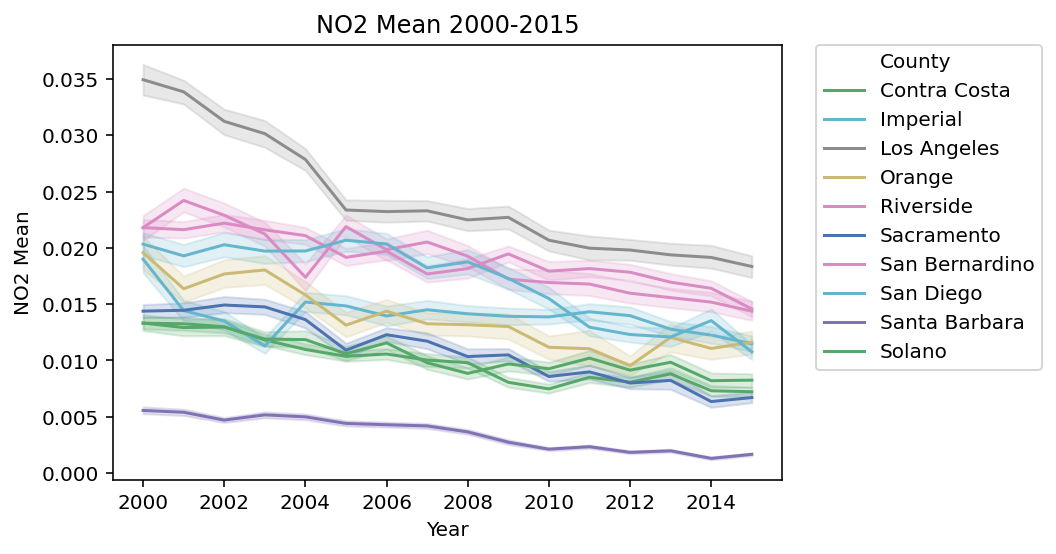

In [143]:
# Line plot for NO2 
ax = sns.lineplot(x="Year", y="NO2 Mean", hue='County', data=pollCali, palette=new_regions)
ax.set_title('NO2 Mean 2000-2015');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

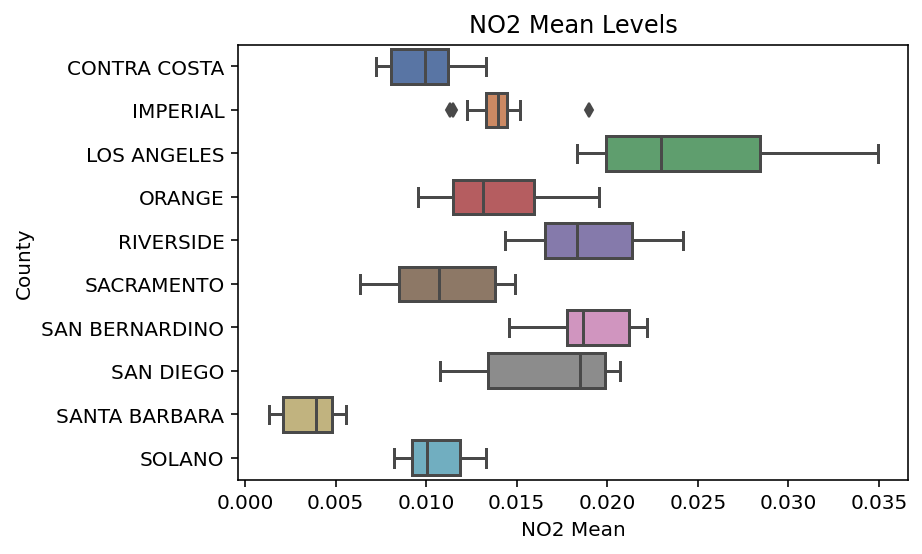

In [144]:
ax = sns.boxplot(x=new_df['NO2 Mean'], y=new_df['County'], data=new_df)
ax.set_title('NO2 Mean Levels');

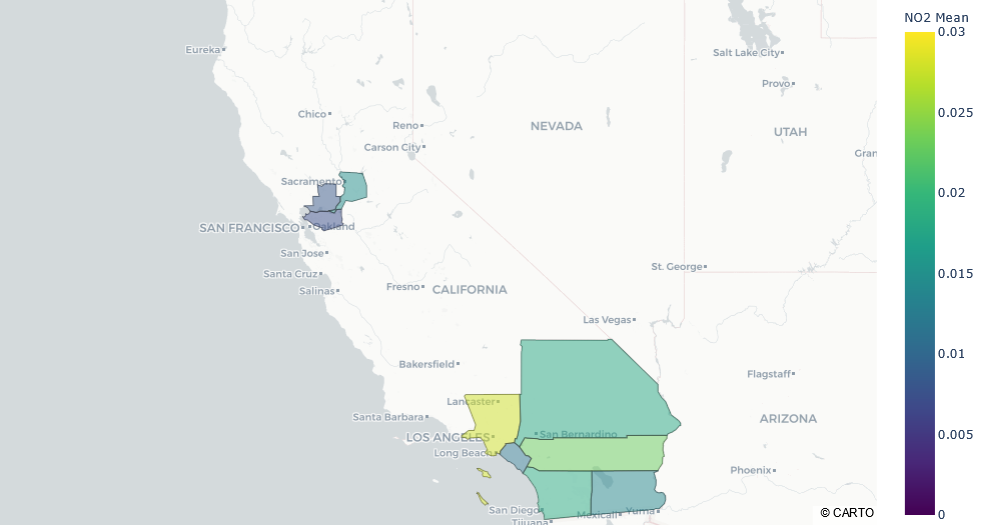

In [145]:
# Isarithmic map for NO2 Mean
Image(filename='NO2 Mean.png') 

**Pollutant 1: Nitrogen Dioxide (NO2)**
   - NO2 formation, or the burning of fossil fuels, results in absorption of heat, which results in decreasing atmospheric temperatures. Here, we see NO2 mean concentration trends have decreased over time, suggesting that implementation of NO2 concentration reduction has already been occurring via the EPA setting standards for local AQI levels. In both our lineplot and boxplot, we notice that Los Angeles county still has a higher prevalence in NO2 averages compared to other counties, which makes sense considering it is one of the largest traffic heavy areas in the state. Santa Barbara has the lowest NO2 concentration average among the counties, which also makes sense considering there is a smaller population and other means of transportation are taken advantage of, such as walking, hiking and bike riding. 
   
   - There seems to be an overall downward trend for the average NO2. The main cause of NO2 is the burning of fossil fuels and over the past couple of years with vigorous California state policies to reduce our environmental footprint with incentives that encourage people to purchase electric cars, it seems that this can explain why we are seeing this downward trend.


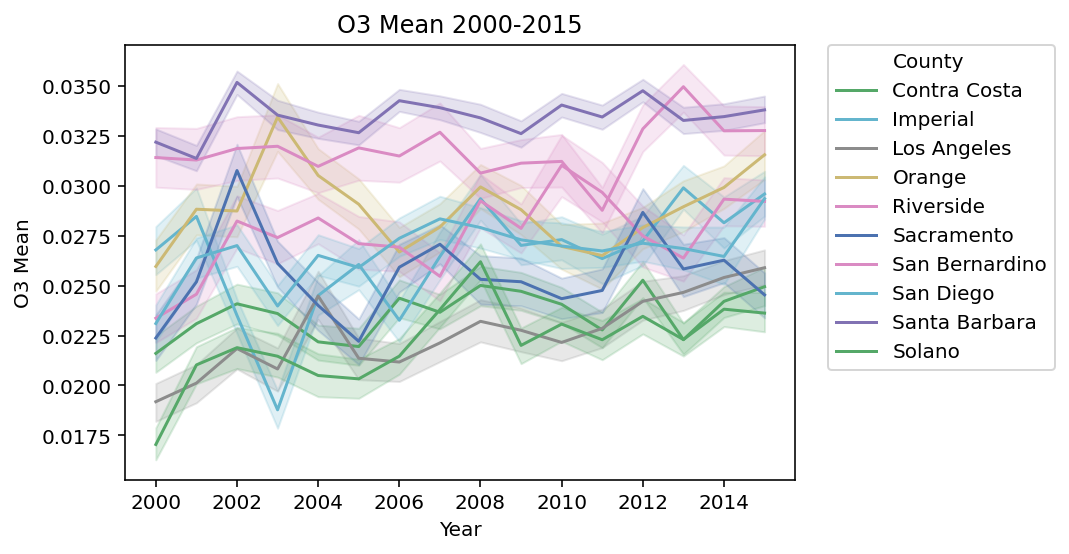

In [146]:
# Line plot for O3 
ax = sns.lineplot(x="Year", y="O3 Mean", hue='County', data=pollCali, palette=new_regions)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('O3 Mean 2000-2015');

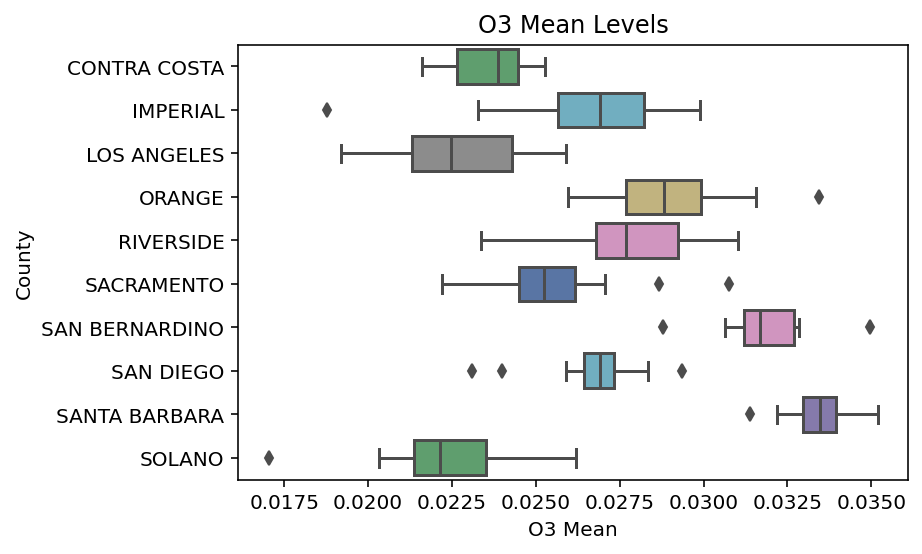

In [147]:
ax = sns.boxplot(x=new_df['O3 Mean'], y=new_df['County'], data=new_df, palette=new_regions_upper)
ax.set_title('O3 Mean Levels');

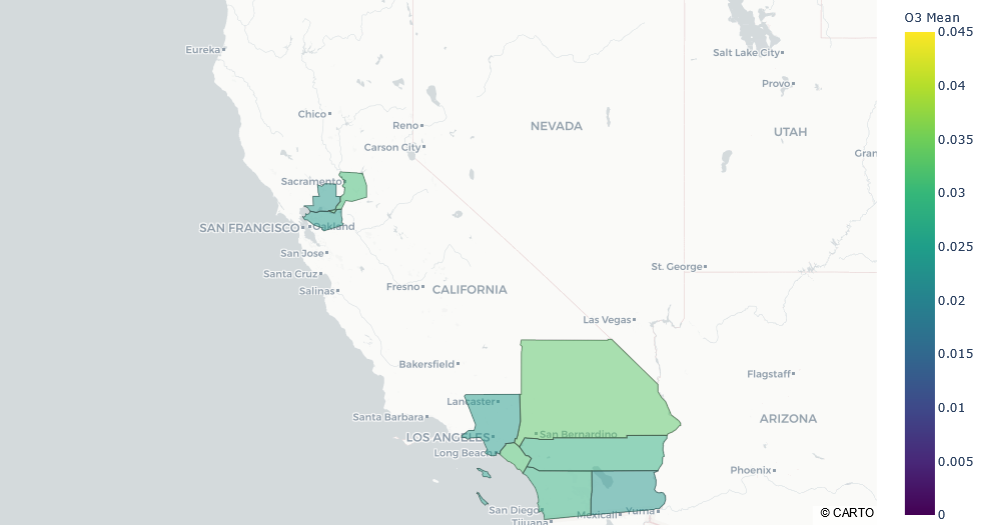

In [148]:
# Isarithmic map for O3
Image(filename='O3 Mean.png') 

**Pollutant 2: Ozone Concentration (O3)**
   - O3 increasing in the atmosphere has a big correlation with increasing temperatures. O3 in the upper atmosphere is actually good as it protects us from harmful UV rays; however, when O3 is closer to the surface, it can lead to adverse health effects, harming respiratory functioning.
   - Here we observe there has been a gradual increase of atmospheric O3 concentrations over time. An interesting thing to note about these plots is that Santa Barbara, which in our data has usually lower amounts of the other pollutants, actually has a higher O3 concentration compared to other counties. Perhaps it is a result of wind travel from Los Angeles and Ventura counties, which are situated south of Santa Barbara and emit larger amounts of pollutants. Sacramento and Orange counties both see spikes in O3 concentrations around 2003, whereas at the same time San Diego is seeing a dip in concetrations.  

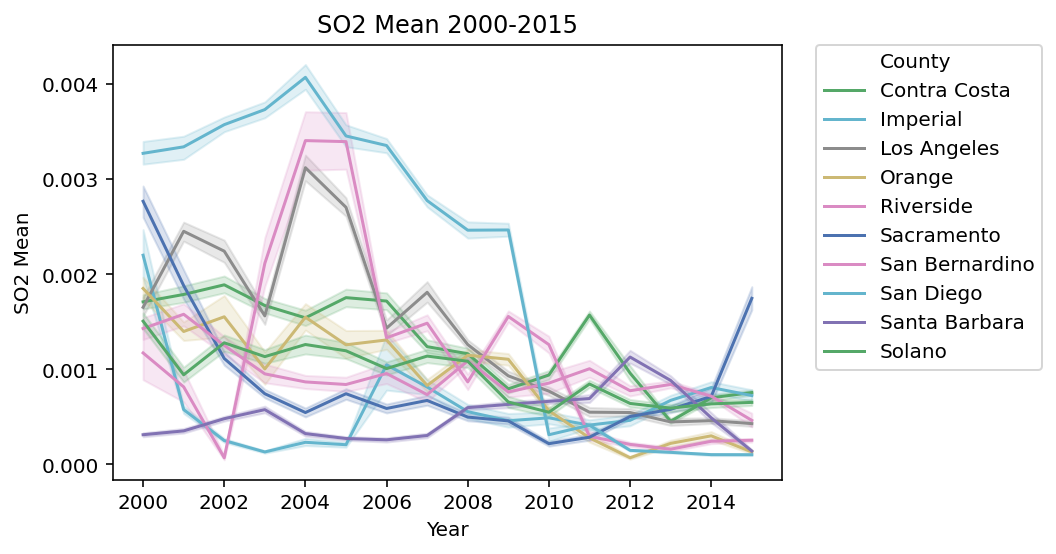

In [149]:
# Line plot for SO2 
ax = sns.lineplot(x="Year", y="SO2 Mean",  hue='County', data=pollCali, palette=new_regions)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('SO2 Mean 2000-2015');

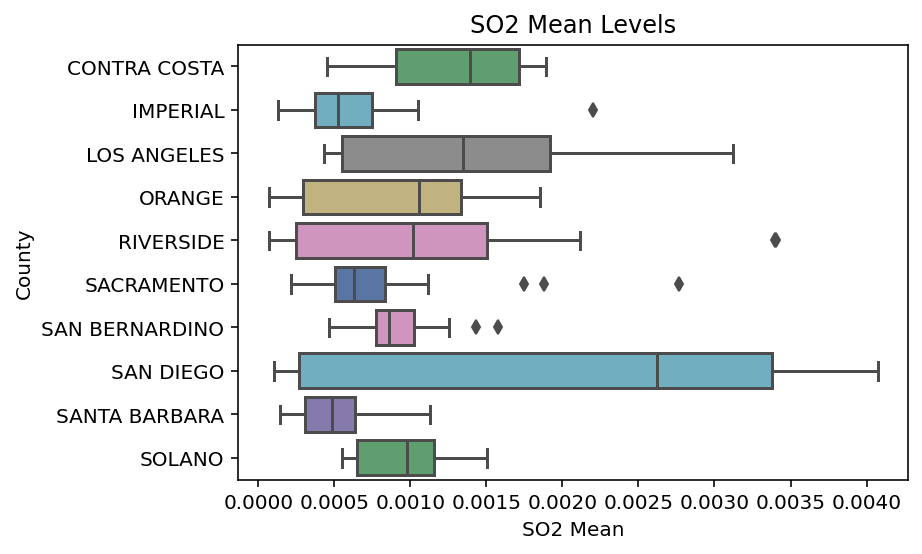

In [150]:
ax = sns.boxplot(x=new_df['SO2 Mean'], y=new_df['County'], data=new_df, palette=new_regions_upper)
ax.set_title('SO2 Mean Levels');

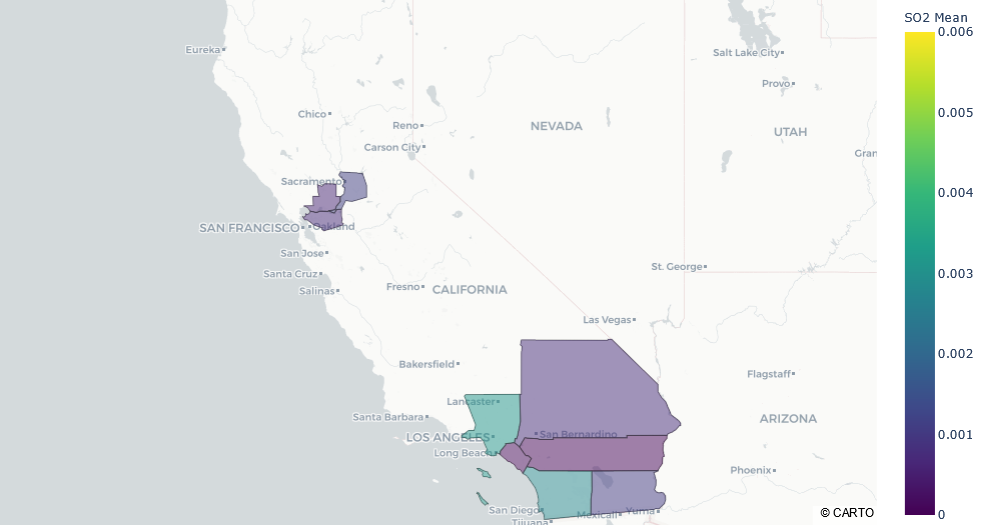

In [151]:
# Isarithmic map for SO2 Mean
Image(filename='SO2 Mean.png') 

**Pollutant 3: Sulfur Dioxide (SO2)**
   - SO2 emissions are caused by fuel burning, specifically from power plants and other industrialized factories. Increased SO2 concentrations result in a decrease in temperature because its molecules are able to reflect solar radiation back away from the surface. However, here we see a decrease in SO2 concentrations, which may be contributing to increasing surface temperatures due to the lack in this atmospheric aerosol. 
   - In our line plot, we see a general downward trend in SO2 concentrations, suggesting that there has been effective government support to decrease pollutant emissions - specifically SO2 due to the fact that this particular pollutant has averse human respiratory health effects. SO2 can also impact plant life by hindering tree growth and damaging foliage. 
   - We notice in the line plot that San Diego has the largest average, but then drops suddenly around 2010, suggesting there were new regulations set in place by the EPA for the county to reduce pollutant emissions. The same spikes in 2004 can be seen for Riverside and Los Angeles counties, which contain a large amount of traffic between each other, much like San Diego's heavy traffic along the I-5. It makes sense that the EPA would intervene and implement new standards for the county to abide by. 

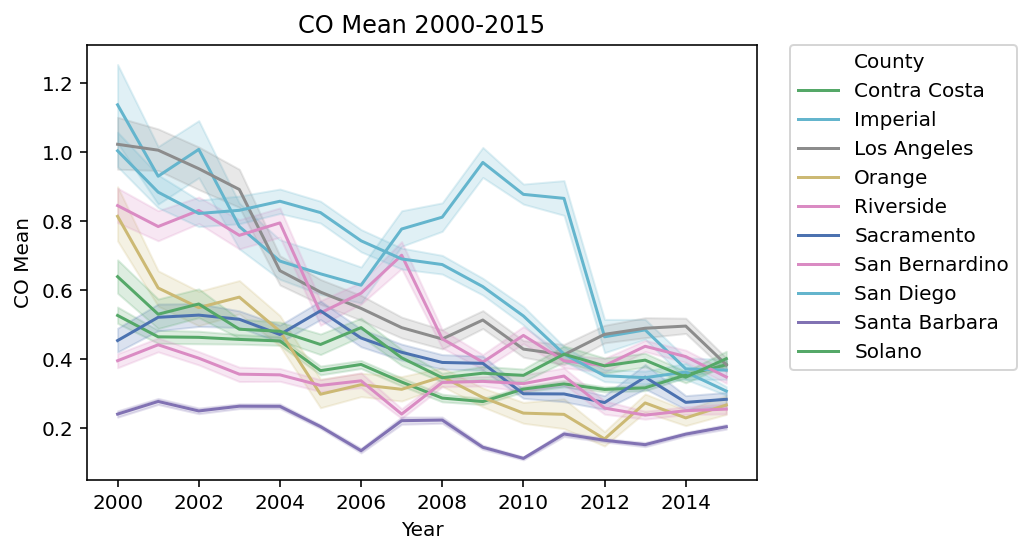

In [152]:
# Line plot for CO 
ax = sns.lineplot(x="Year", y="CO Mean", hue='County', data=pollCali, palette=new_regions)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('CO Mean 2000-2015');

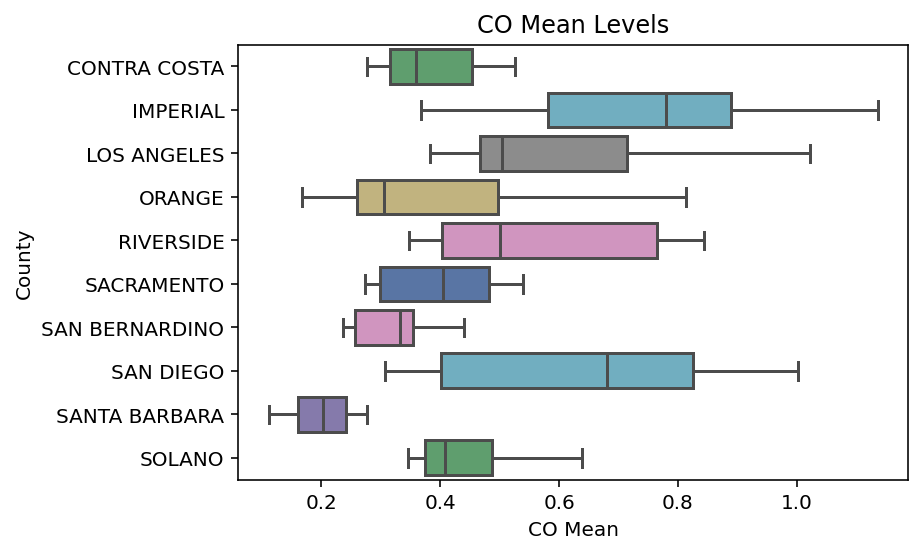

In [153]:
ax = sns.boxplot(x=new_df['CO Mean'], y=new_df['County'], data=new_df, palette=new_regions_upper)
ax.set_title('CO Mean Levels');

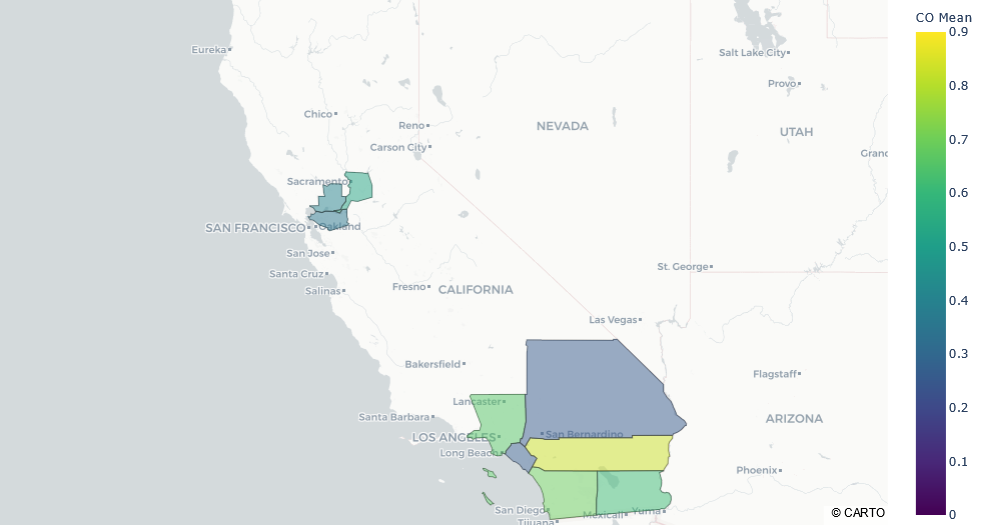

In [154]:
# Isarithmic map for CO Mean
Image(filename='CO Mean.png') 

**Pollutant 4: Carbon Monoxide (CO)**
   - CO concentrations result in heat-fueling greenhouse gases, such as methane and O3, to increase in concentration. This typically leads to increases in temperatures, and is fueled primarily in the summer months when something is burned. However, in our plot we see an overall downward trend and a leveling out in the average concentrations of CO in the atmosphere. This suggests there has been more regulation of fuel emissions, reducing atmospheric CO. 
   - We noticed that San Diego has a large spike in CO concentrations around 2010, also apparent in the boxplot as the box has a larger IQR. This may be a result in the large wildfire Aliso, which burned 3,225 acres, that occurred in San Diego around this same time period. Considering wild fires contribute to increased CO emissions, it would make sense to expect large spikes when wild fires occur. 
   
<b>References: </b>
1. https://www.nap.edu/read/10378/chapter/3
2. https://courses.lumenlearning.com/cheminter/chapter/effect-of-temperature/
3. https://www.epa.gov/no2-pollution/basic-information-about-no2#What%20is%20NO2
4. https://www.ncsl.org/research/energy/state-electric-vehicle-incentives-state-chart.aspx#:~:text=Under%20the%20program%2C%20ARB%20offers,or%20lease%20new%20eligible%20vehicles
5. https://www.epa.gov/so2-pollution/sulfur-dioxide-basics#what%20is%20so2
6. https://en.wikipedia.org/wiki/2010_California_wildfires

Let's try to view temperature trend over time for each county by region using our new dataframe. 

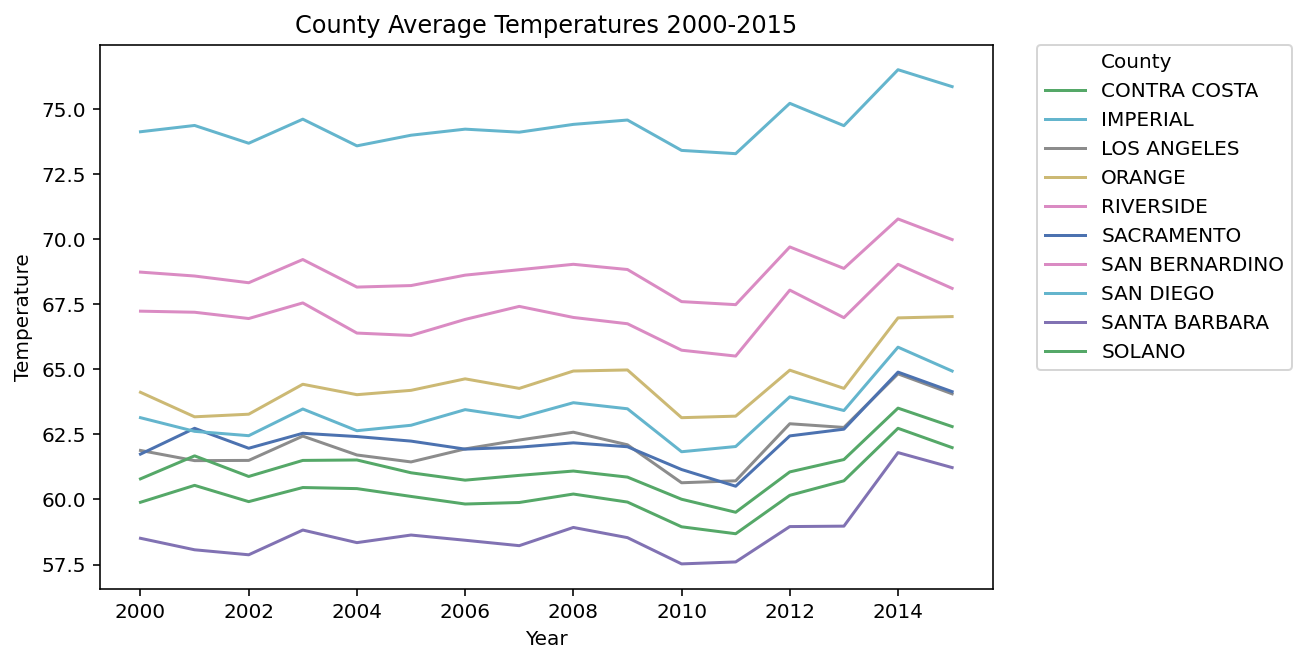

In [155]:
fig, ax = plt.subplots(figsize=(8,5))
a = sns.lineplot(data=new_df, x='Year', y='Temperature', hue = 'County', ax = ax, palette=new_regions_upper)
a.set_title('County Average Temperatures 2000-2015');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

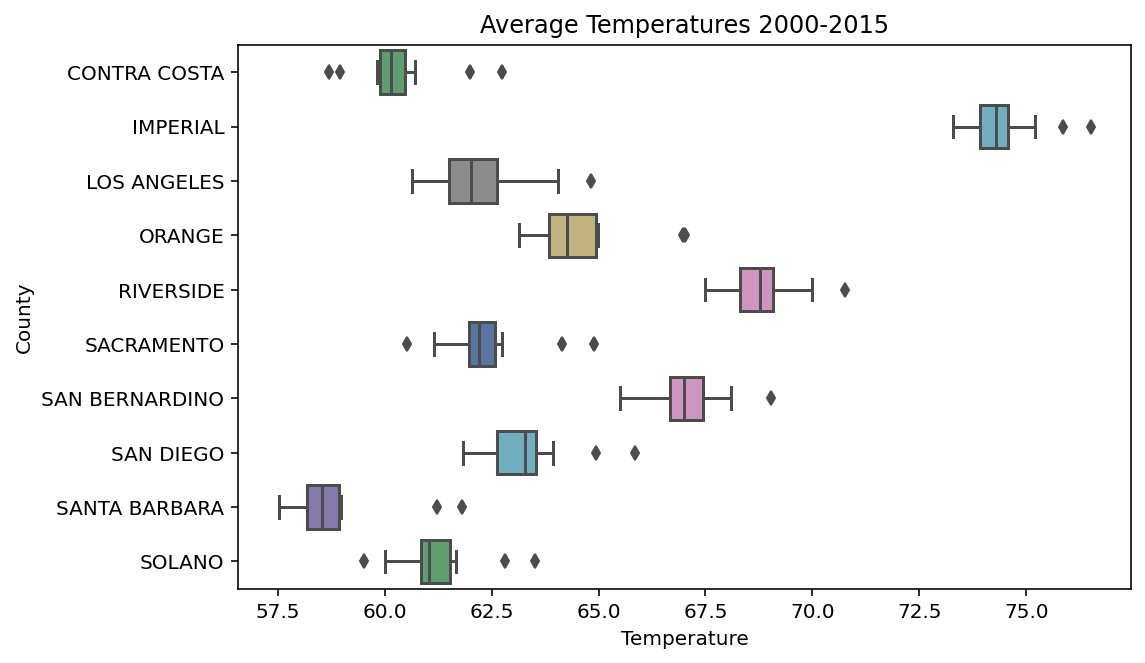

In [156]:
# boxplot for the temperature data with the same color palette as the line plot
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.boxplot(x=new_df['Temperature'], y=new_df['County'], data=new_df, palette=new_regions_upper)
ax.set_title('Average Temperatures 2000-2015');

The line plot shows a general upward trend meaning that as the years progress the average temperature is increasing for the counties. There is a sudden increase in temperature common throughout all the counties from 2012-2014. These are the same years where we faced the most severe drought conditions which led to the record high temperatures we are seeing in the line plot.
(source: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL062433)

The boxplot also shows the impact of the drought through the multiple unusual observations, outliers, for each county. For example, in Sacremento the average max temperature is about 63 degrees F but it has 2 outliers at around 64 and 65 degrees F. The boxplots for Los Angeles, Contra Costa County have a fairly positive skew distribution meaning that their temperatures tend to be closer to their cooler temperatures, which for the case of Contra Costa makes sense as it very close to the coast and that produces colder climates. Imperial, San Bernandino, and Riverside County seem to have a normal distribution meaning their temperatures are typically about the same on average. San Diego, Sacremento, Orange, Santa Barbara, and Solano County have a slight negative skew meaning that their temperatures tend to be close to their higher temperatures. This makes sense as these counties are either inland or located more towards the south where temperatures are higher and do not get the benefit of the cooler coastal breezes.

Since our dataset on pollution is limited to the years 2000 to 2015, we will be focusing on this range of years when we compare pollution and temperature. 

In [157]:
# filter original new_df to only get Year 2000 and 2016
df_avg_2000 = new_df[(new_df.Year == 2000) | (new_df.Year == 2015)]
df_avg_2000

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Region
0,2000,CONTRA COSTA,59.891667,0.013313,22.603370,0.021606,28.677368,0.001711,5.872040,0.525496,8.272769,3
150,2015,CONTRA COSTA,61.991667,0.007229,13.496347,0.024950,33.710502,0.000757,1.574886,0.382750,5.281279,3
151,2015,IMPERIAL,75.858333,0.011490,25.738889,0.029597,48.402778,0.000725,2.680556,0.366919,8.127778,10
1,2000,IMPERIAL,74.125000,0.018993,43.329073,0.026793,42.418530,0.002201,7.718850,1.135875,26.415335,10
152,2015,LOS ANGELES,64.058333,0.018346,31.142851,0.025901,39.578891,0.000430,1.542283,0.382438,6.646738,8
2,2000,LOS ANGELES,61.883333,0.034928,53.838570,0.019185,31.361339,0.001653,8.337204,1.021396,18.616120,8
3,2000,ORANGE,64.116667,0.019570,33.612022,0.025964,33.000000,0.001851,5.464481,0.812796,14.237705,9
153,2015,ORANGE,67.025000,0.011618,20.956522,0.031561,42.217391,0.000132,0.286957,0.266088,4.736232,9
154,2015,RIVERSIDE,69.983333,0.014377,26.600559,0.029225,61.550279,0.000255,0.175978,0.347186,5.909218,7
4,2000,RIVERSIDE,68.733333,0.021794,37.017857,0.023372,49.321429,0.001173,4.389881,0.843789,15.142857,7


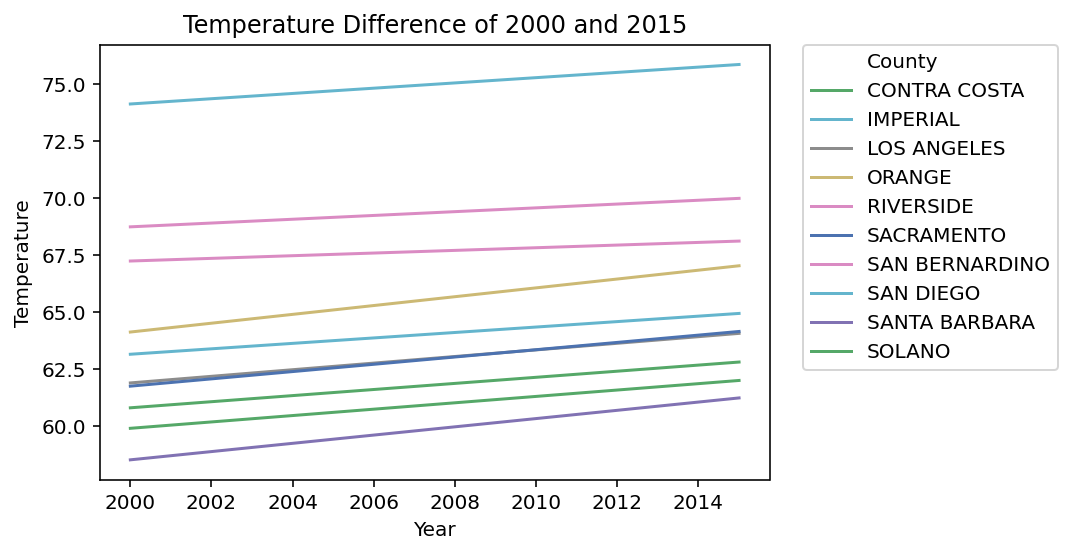

In [158]:
ax = sns.lineplot(
    data=df_avg_2000,  x='Year', y='Temperature', hue = 'County', palette=new_regions_upper)
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('Temperature Difference of 2000 and 2015');

This confirms that there is an increase in the temperatures between 2000 and 2015.

### Temperature vs. Pollution

Now let's look at direct visual comparisons between temperature and our four different pollutants.
Each county is colored by region, as it has been for all the visuals shown thus far.

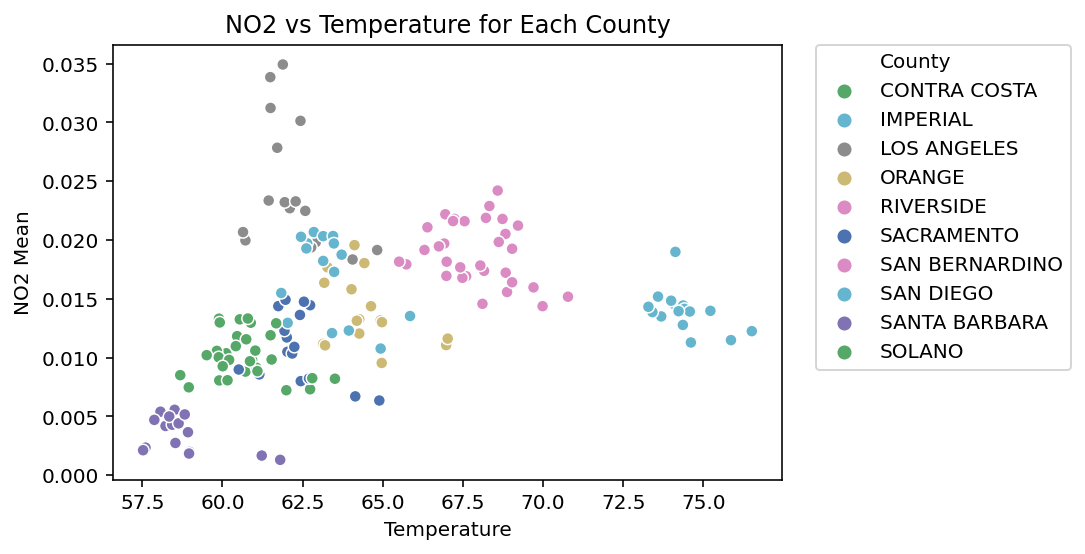

In [159]:
# NO2
ax = sns.scatterplot(data=new_df, x='Temperature', y='NO2 Mean', hue='County', palette = new_regions_upper)
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('NO2 vs Temperature for Each County');

The scatter plot for NO2 and temperature show that there is a positive correlation between these two variables. We also see that each county is generally clustered with other counties in their same region. This is evident in that we can identify distinct grouping of each color. The blue dots(Imperial and San Diego County), seem to have two separate groups so we will examine these counties further to see what is causing the shift in temperature for the similar amount of NO2.

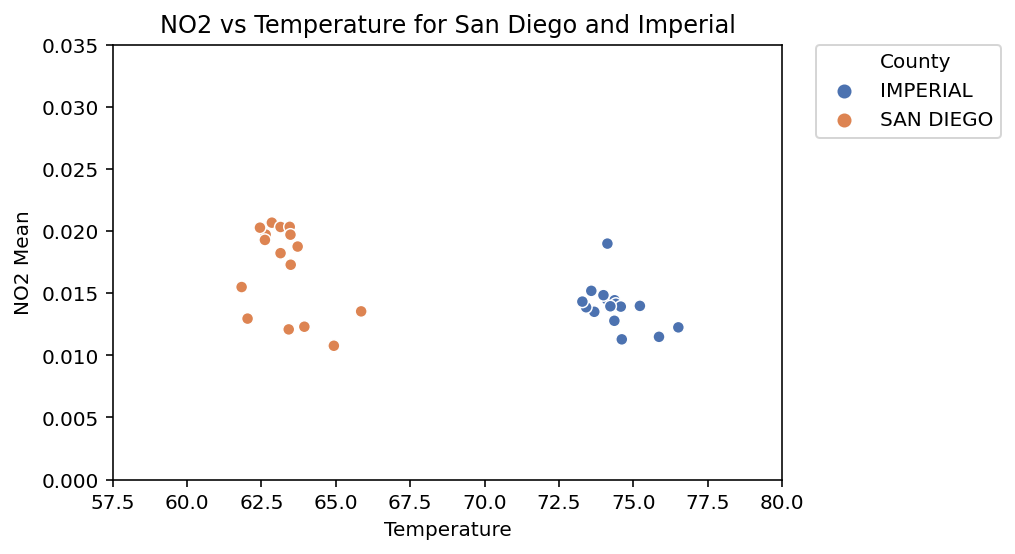

In [160]:
sand_imperial = new_df[(new_df['County'] == "SAN DIEGO") | (new_df['County'] == "IMPERIAL")]
ax = sns.scatterplot(data=sand_imperial, x='Temperature', y='NO2 Mean', hue='County')
plt.xlim([57.5, 80])
plt.ylim([0, 0.035])
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('NO2 vs Temperature for San Diego and Imperial');

We see that the two different groups of the same region are clustered by which county they are from. This is apparent by the cluster of orange dots (San Diego) and the cluster of blue dots (Imperial). The explanation as to why they have similar NO2 values but different temperature is because San Diego county is located closer to the coast, which results in a cooler average temperature due to the coastal breeze while Imperial County is located more inland towards the desert. The NO2 values may be the same as NO2 is a product of man-made and natural gas combustion along with sunlight and due to them being in the same region, both have similar climates and UV indexes which may produce similar levels of NO2.

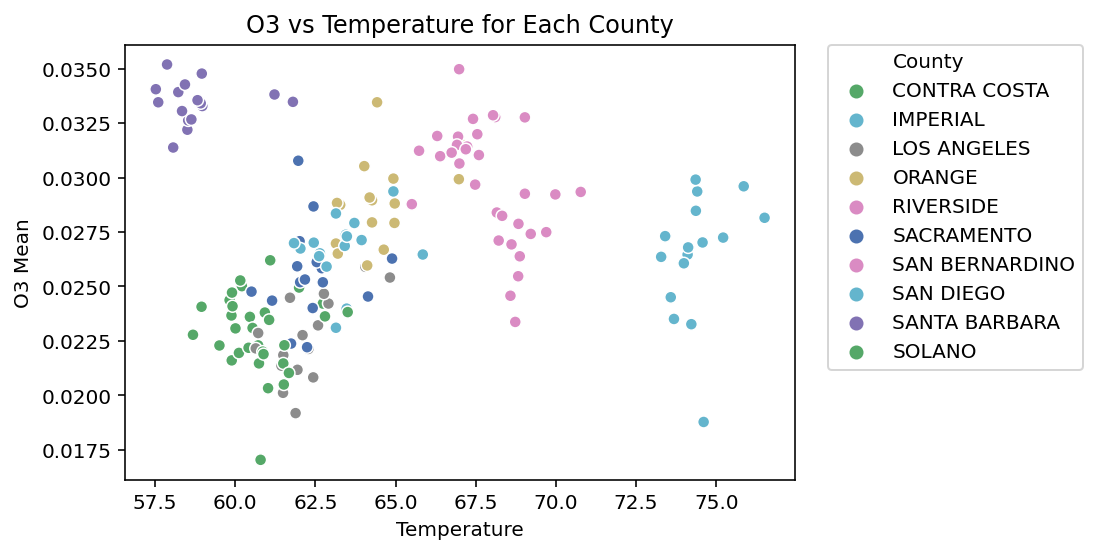

In [161]:
# O3
ax = sns.scatterplot(data=new_df, x='Temperature', y='O3 Mean', hue='County', palette = new_regions_upper)
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('O3 vs Temperature for Each County');

We see that most counties have a positive correlation with their average O3 levels and temperature. Again we see a cluster of pink dots (San Bernardino and Riverside) where it seems like there a negative correlation. We will examine these two counties to clarify what we are seeing.

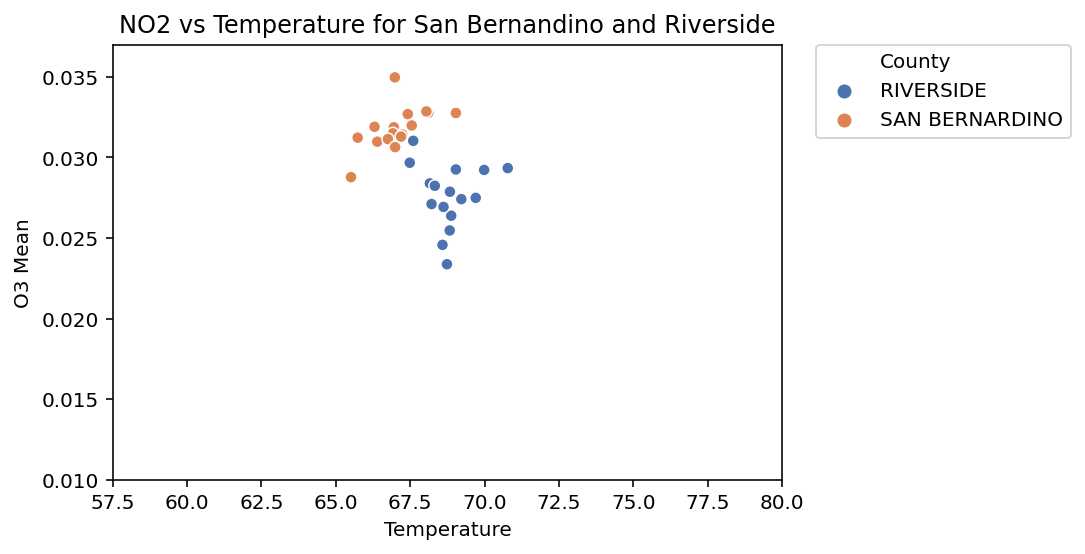

In [162]:
# San Bernardino and Riverside
sanb_riverside = new_df[(new_df['County'] == "SAN BERNARDINO") | (new_df['County'] == "RIVERSIDE")]
ax = sns.scatterplot(data=sanb_riverside, x='Temperature', y='O3 Mean', hue='County')
plt.xlim([57.5, 80])
plt.ylim([0.01, 0.037])
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('NO2 vs Temperature for San Bernandino and Riverside');

By only plotting Riverside and San Bernardino we can see that both counties also follow the trend of having a positive correlation with temperature and O3. Being in the same region, it also shows us that they have similar temperature though San Bernardino seems to have higher values of O3. We see that O3 concentations are affected by location and can travel on air currents, and as San Bernardino have mountains that hug the northeastern side of the county, this causes San Bernardino to be heavily impacted by the pollutants that are brought to it through transport airways.

(source: https://cfpub.epa.gov/roe/indicator_pdf.cfm?i=8#:~:text=Wind%20can%20affect%20both%20the,distances%2C%20affecting%20areas%20far%20downwind.)

(source: https://ww2.arb.ca.gov/sites/default/files/classic//research/apr/reports/l3067.pdf)

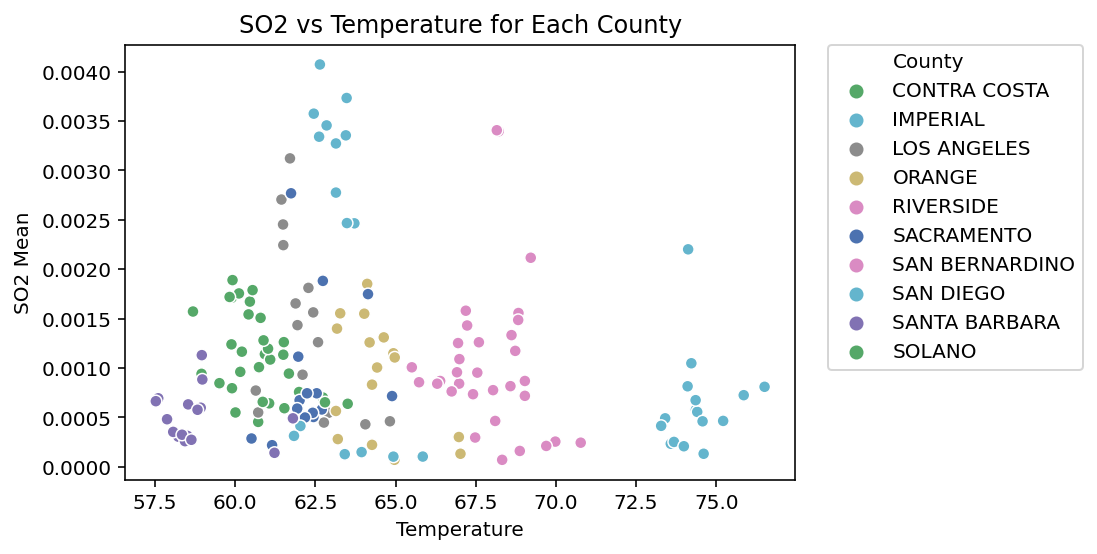

In [163]:
# SO2
ax = sns.scatterplot(data=new_df, x='Temperature', y='SO2 Mean', hue='County', palette = new_regions_upper)
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('SO2 vs Temperature for Each County');

In this scatterplot, we can see that the counties in each region are not as tightly clustered as the previous scatterplots with O3 and NO2. There seems to be no correlation with the average SO2 ppm and temperature for each region as they are typically vertical. In other words, the increase of SO2 seems to have no correlation to the increase of temperature. However, it is odd that there are light blue dots(Imperial and San Diego) scattered in various locations, so we will examine what these values are. 

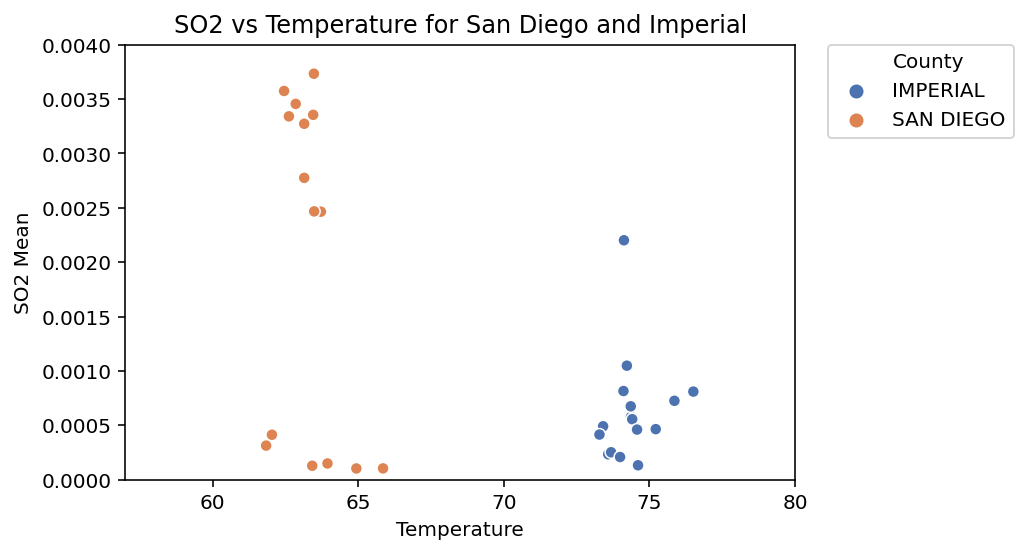

In [164]:
# San Diego and Imperial
sand_imperial = new_df[(new_df['County'] == "SAN DIEGO") | (new_df['County'] == "IMPERIAL")]
ax = sns.scatterplot(data=sand_imperial, x='Temperature', y='SO2 Mean', hue='County')
plt.xlim([57, 80])
plt.ylim([0, 0.004])
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('SO2 vs Temperature for San Diego and Imperial');

There is a large distrubtion of SO2 levels for San Diego. While values within Imperial County are relatively clustered, there is one outlier that we will examine along with the two clusters of San Diego County values.

In [165]:
new_df[(new_df['County']=='SAN DIEGO') & (new_df['SO2 Mean'] > 0.002)]

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Region
57,2005,SAN DIEGO,62.850000,0.020679,34.683288,0.025911,33.249680,0.003456,8.683379,0.823450,12.629224,10
87,2008,SAN DIEGO,63.716667,0.018756,32.785519,0.027914,35.451275,0.002464,5.850182,0.672922,10.443078,10
7,2000,SAN DIEGO,63.141667,0.020330,35.151002,0.023104,30.293443,0.003273,10.288069,1.002551,16.028689,10
47,2004,SAN DIEGO,62.641667,0.019722,33.809654,0.026519,34.364754,0.004072,10.274135,0.856402,13.143898,10
67,2006,SAN DIEGO,63.450000,0.020343,35.034521,0.027376,34.870959,0.003355,8.611233,0.741775,11.584475,10
37,2003,SAN DIEGO,63.475000,0.019712,35.059187,0.023982,30.954663,0.003733,8.135734,0.830097,13.372114,10
97,2009,SAN DIEGO,63.483333,0.017293,30.468950,0.027299,33.693607,0.002467,5.804110,0.608986,9.652055,10
17,2001,SAN DIEGO,62.616667,0.019289,34.135989,0.026391,34.015018,0.003341,10.514560,0.882695,14.032051,10
27,2002,SAN DIEGO,62.450000,0.020276,35.745662,0.027011,34.669406,0.003575,8.605479,0.820963,13.134703,10
77,2007,SAN DIEGO,63.141667,0.018224,31.758813,0.028350,35.176712,0.002776,6.241735,0.689164,10.757991,10


We can see that the high SO2 values for San Diego are from years before 2010 and the smaller values less than 0.0005 ppm are contributed from the years 2010-2015. The reason for this drastic difference is because on June 2, 2010, the County of San Diego adopted a new 1-hour SO2 standard where at each collection site, the 1-hour daily maximum concentration cannot exceed 0.0075 ppm of SO2.
(source: https://www.sandiegocounty.gov/content/dam/sdc/pds/ceqa/OtayHills/Sect-3-6-Existing-AQ.pdf)

In [166]:
# to check the odd value from Imperial County
new_df[(new_df['County']=='IMPERIAL') & (new_df['SO2 Mean'] > 0.002)]

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Region
1,2000,IMPERIAL,74.125,0.018993,43.329073,0.026793,42.41853,0.002201,7.71885,1.135875,26.415335,10


We see that the single outlier for Imperial County is from 2000. Overall California has been making strides in becoming a more 'green' state, so it is not surprising to see that Imperial County may have started to adopt policies that would reduce their SO2 levels. This would explain why 2000 is the highest and more recent years have smaller values.

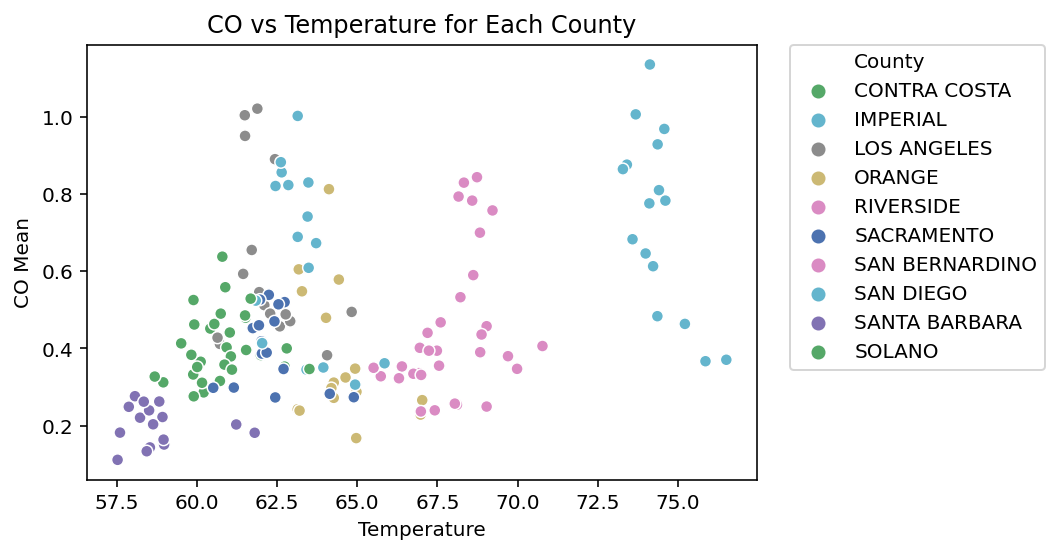

In [167]:
# CO
ax = sns.scatterplot(data=new_df, x='Temperature', y='CO Mean', hue='County', palette = new_regions_upper)
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('CO vs Temperature for Each County');

There seems to be a positive correlation for Santa Barbara County (purple) and Contra Costa and Solano (green). However, similar to the SO2 scatterplot, the other counties seem to have no correlation with their CO levels and Temperature. We will examine the previous mentioned counties to see if there really is a positive correlation.

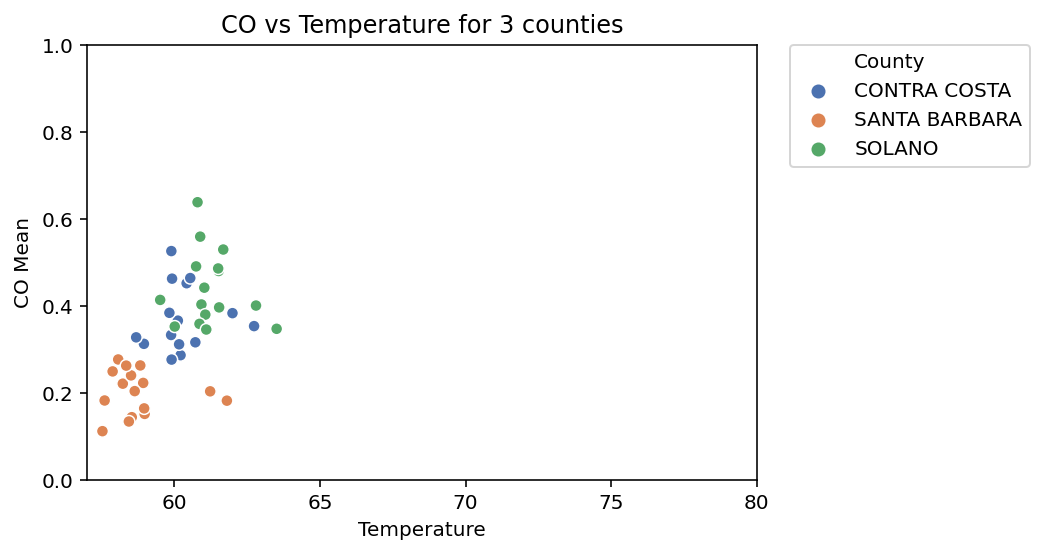

In [168]:
# Santa Barbara County(purple) and Contra Costa and Solano(green)
sand_imperial = new_df[(new_df['County'] == "SANTA BARBARA") | (new_df['County'] == "CONTRA COSTA")  | (new_df['County'] == "SOLANO")]
ax = sns.scatterplot(data=sand_imperial, x='Temperature', y='CO Mean', hue='County')
plt.xlim([57, 80])
plt.ylim([0, 1])
# place legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('CO vs Temperature for 3 counties');

Now that we have separated the counties from their region we can conclude that there is no correlation with CO levels and temperature. The false positive correlation from Contra Costa and Solano was because they were from the same region and Solano had higher values than Contra Costa County which made it seem like there was a correlation. In addition, Santa Barbara has temperatures of 62 degrees F but its CO levels are the same as when it had an average temperature of 52 degrees F (10 degree difference!), showing that there's little to no correlation.

We're now going to see the mean and median of pollution and temperature for each county across all 15 years.

In [169]:
print("\n----------- Calculate Mean -----------\n")
print(new_df.groupby('County')[['Temperature', 'O3 Mean', 'NO2 Mean', 'SO2 Mean', 'CO Mean']].mean())
 
print("\n----------- Calculate Median -----------\n")
print(new_df.groupby('County')[['Temperature', 'O3 Mean', 'NO2 Mean', 'SO2 Mean', 'CO Mean']].median())



----------- Calculate Mean -----------

                Temperature   O3 Mean  NO2 Mean  SO2 Mean   CO Mean
County                                                             
CONTRA COSTA      60.274479  0.023618  0.009915  0.001291  0.375251
IMPERIAL          74.394271  0.026425  0.013968  0.000629  0.736109
LOS ANGELES       62.205208  0.022645  0.024399  0.001399  0.612317
ORANGE            64.474479  0.028864  0.013809  0.000911  0.375549
RIVERSIDE         68.809896  0.027611  0.018816  0.001166  0.569380
SACRAMENTO        62.351042  0.025540  0.010924  0.000879  0.403136
SAN BERNARDINO    67.068750  0.031801  0.019020  0.000946  0.324036
SAN DIEGO         63.310938  0.026713  0.016986  0.002107  0.639405
SANTA BARBARA     58.778125  0.033444  0.003527  0.000507  0.200336
SOLANO            61.214062  0.022145  0.010525  0.000946  0.438481

----------- Calculate Median -----------

                Temperature   O3 Mean  NO2 Mean  SO2 Mean   CO Mean
County                          

The median and mean values of temperature and the average and median levels of O3, SO2, NO2, and CO are all fairly similar such that it shows that the values in our dataset for each variable are not skewed.  

We will now view a correlation matrix to confirm what we analyzed through the scatter and line plots with the actual values from the dataset.

In [170]:
numeric_col = ['Temperature', 'NO2 Mean','O3 Mean', 'SO2 Mean','CO Mean']
corr_matrix = new_df.loc[:,numeric_col].corr()
print(corr_matrix)


             Temperature  NO2 Mean   O3 Mean  SO2 Mean   CO Mean
Temperature     1.000000  0.324908  0.113205 -0.122745  0.393827
NO2 Mean        0.324908  1.000000 -0.273901  0.470140  0.643153
O3 Mean         0.113205 -0.273901  1.000000 -0.245386 -0.443871
SO2 Mean       -0.122745  0.470140 -0.245386  1.000000  0.507548
CO Mean         0.393827  0.643153 -0.443871  0.507548  1.000000


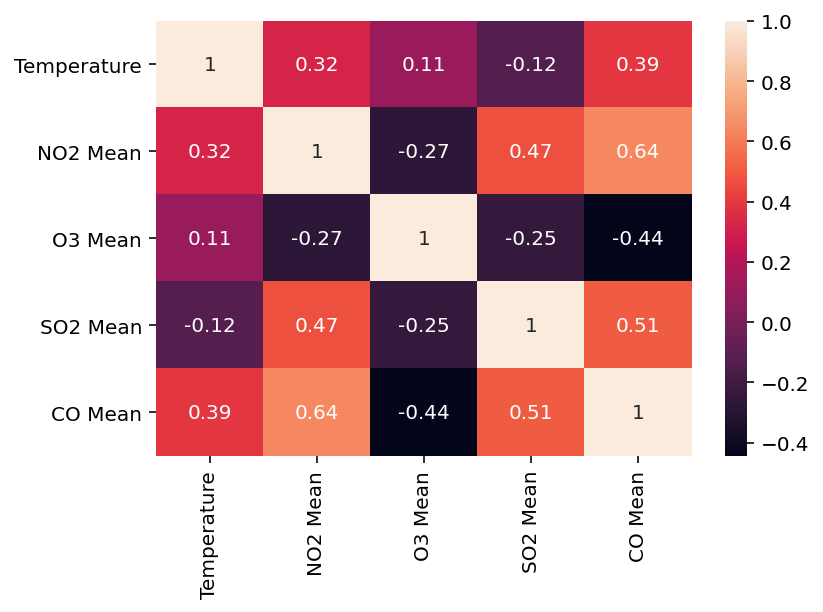

In [171]:
sns.heatmap(corr_matrix, annot = True)

Looking at our correlation matrix and heatmap, we can see that there is a negative, low correlation (-0.12) between SO2 Mean and Temperature. According to the National Institute of Environmental Health Sciences, SO2, or Sulfur Dioxide, is a gas from volcanic eruptions that actually cools the Earth’s surface temperature. So as SO2 increases, we would observe a subsequent decrease in temperature, which explains the negative correlation. The NIH also mentioned that SO2 can cause acid rain, which is why the U.S. has made an effort to reduce SO2 emissions. Doing further research on this topic led us to Statista, which stated that the reduction of SO2 was ordered under the Acid Rain Program of the Clean Air Act and that SO2 emissions in the U.S. have been decreasing for decades. Since we are analyzing the years between 2000 and 2015, which is fairly recent, there might not be enough SO2 in the atmosphere to allow us to use it to predict temperature. This explains why the correlation we saw was so low. Because of this, we have decided to remove SO2 Mean from our predictions.

For the gases NO2 and CO, we observed moderate positive correlation coefficients, which was within our expectations.

<b>References:</b>
1. https://tools.niehs.nih.gov/cchhl/index.cfm?do=main.detail&reference_id=8437#:~:text=Large%20volumes%20of%20SO2%20erupted,less%20than%20one%20million%20years
2. https://www.statista.com/statistics/501303/volume-of-sulfur-dioxide-emissions-us/

# Linear Regression Model for temperature prediction

We will begin by training our model using the pollution data we have as our independent variables and temperature data as our dependent variable.

Now let's begin our linear regression model...

In [172]:
new_df_2014 = new_df[new_df['Year'] < 2015]
# new_df_noNA = new_df.fillna(0)
# new_df_2014 = new_df_noNA[new_df_noNA['Year'] < 2015]

In [173]:
# independent variables
X = new_df_2014[['NO2 Mean', 'O3 Mean', 'CO Mean']]
# dependent variable, what we will be predicting
Y = new_df_2014['Temperature']

# training our model with our variables
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [174]:
# rename the columns to remove the whitespaces as patsy can't read spaces in variable names
new_df_2014 = new_df_2014.rename(columns={'NO2 Mean': 'NO2_mean', 'O3 Mean': 'O3_mean', 'CO Mean': 'CO_mean'})

In [175]:
outcome, predictors = patsy.dmatrices('Temperature ~ NO2_mean + CO_mean + O3_mean', new_df_2014)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     19.70
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           8.85e-11
Time:                        15:40:22   Log-Likelihood:                -413.72
No. Observations:                 150   AIC:                             835.4
Df Residuals:                     146   BIC:                             847.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6133      2.813     16.926      0.0

From our OLS Regression results, we can see that for every 1 PPM increase of NO2, temperature increases by 76.6129 degrees; for every 1 PPM increase of CO, temperature increases by 10.3901 degrees; and for every 1 PPM increase of O3, temperature increases by 392.0366 degrees.

We will now use this to make predictions for the average temperature across the 10 counties for 2015.

In [176]:
new_df_2015 = new_df[new_df['Year'] == 2015]
new_df_2015

,Year,County,Temperature,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Region
150,2015,CONTRA COSTA,61.991667,0.007229,13.496347,0.024950,33.710502,0.000757,1.574886,0.382750,5.281279,3
151,2015,IMPERIAL,75.858333,0.011490,25.738889,0.029597,48.402778,0.000725,2.680556,0.366919,8.127778,10
152,2015,LOS ANGELES,64.058333,0.018346,31.142851,0.025901,39.578891,0.000430,1.542283,0.382438,6.646738,8
153,2015,ORANGE,67.025000,0.011618,20.956522,0.031561,42.217391,0.000132,0.286957,0.266088,4.736232,9
154,2015,RIVERSIDE,69.983333,0.014377,26.600559,0.029225,61.550279,0.000255,0.175978,0.347186,5.909218,7
155,2015,SACRAMENTO,64.141667,0.006707,16.126074,0.024539,40.249284,0.001748,2.630372,0.282538,4.948424,1
156,2015,SAN BERNARDINO,68.108333,0.014577,27.668493,0.032775,59.624658,0.000464,2.445205,0.254082,4.812329,7
157,2015,SAN DIEGO,64.933333,0.010772,19.067449,0.029362,39.545455,0.000103,0.014663,0.306278,4.480938,10
158,2015,SANTA BARBARA,61.225000,0.001671,4.192694,0.033812,37.704110,0.000141,1.067123,0.202990,2.561187,5
159,2015,SOLANO,62.800000,0.008255,15.986226,0.023627,31.622590,0.000653,0.887052,0.400223,6.512397,3


In [177]:
def predict(No2, O3, CO):
    result = regr.predict([[No2, O3, CO]])
    return result[0]

In [178]:
# apply the linear regression prediction on the 2015 values (test set)
new_df_2015['Temperature Predictions']=new_df_2015.apply(lambda x: predict(x['NO2 Mean'], x['O3 Mean'], x['CO Mean']), axis=1)

In [179]:
# rearranging columns so actual temperature and prediction are beside each other for better analysis
cols = ['Year','County','NO2 Mean','NO2 AQI','O3 Mean','O3 AQI',
         'SO2 Mean','SO2 AQI','CO Mean', 'CO AQI', 'Temperature', 'Temperature Predictions']
new_df_2015 = new_df_2015[cols]

In [180]:
new_df_2015

,Year,County,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,Temperature,Temperature Predictions
150,2015,CONTRA COSTA,0.007229,13.496347,0.024950,33.710502,0.000757,1.574886,0.382750,5.281279,61.991667,61.925350
151,2015,IMPERIAL,0.011490,25.738889,0.029597,48.402778,0.000725,2.680556,0.366919,8.127778,75.858333,63.909291
152,2015,LOS ANGELES,0.018346,31.142851,0.025901,39.578891,0.000430,1.542283,0.382438,6.646738,64.058333,63.146583
153,2015,ORANGE,0.011618,20.956522,0.031561,42.217391,0.000132,0.286957,0.266088,4.736232,67.025000,63.641309
154,2015,RIVERSIDE,0.014377,26.600559,0.029225,61.550279,0.000255,0.175978,0.347186,5.909218,69.983333,63.779277
155,2015,SACRAMENTO,0.006707,16.126074,0.024539,40.249284,0.001748,2.630372,0.282538,4.948424,64.141667,60.682801
156,2015,SAN BERNARDINO,0.014577,27.668493,0.032775,59.624658,0.000464,2.445205,0.254082,4.812329,68.108333,64.219199
157,2015,SAN DIEGO,0.010772,19.067449,0.029362,39.545455,0.000103,0.014663,0.306278,4.480938,64.933333,63.131936
158,2015,SANTA BARBARA,0.001671,4.192694,0.033812,37.704110,0.000141,1.067123,0.202990,2.561187,61.225000,63.105842
159,2015,SOLANO,0.008255,15.986226,0.023627,31.622590,0.000653,0.887052,0.400223,6.512397,62.800000,61.666598


We will now calculate the Root Mean Squared Error (RMSE) to measure how far from the regression line the data points are and thus, how accurate our prediction model is.

In [181]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(new_df_2015['Temperature'], new_df_2015['Temperature Predictions'])))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(new_df_2015['Temperature'], new_df_2015['Temperature Predictions']))


Coefficients: 
 [ 76.61286207 392.03662862  10.39009831]
Root Mean squared error: 4.78
Coefficient of determination: -0.30


As you can see, we have a RMSE (Root Mean Squared Error) of 4.91 degrees F. This is great because it means that the standard deviation of the unexplained variance or how far away the data is from our model is about 4.91 degrees hotter or colder than the actual temperature recorded. We will conclude that this is a good model given that we had incomplete data and only data for 4 years to truly train our model.

Since we saw that there was little correlation between O3 Mean and Temperature, we decided to try running our linear regression without O3 Mean.

In [182]:
# independent variables
X = new_df_2014[['NO2_mean', 'CO_mean']]
# dependent variable, what we will be predicting
Y = new_df_2014['Temperature']

# training our model with our variables
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
outcome, predictors = patsy.dmatrices('Temperature ~ NO2_mean + CO_mean', new_df_2014)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     17.46
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.57e-07
Time:                        15:40:23   Log-Likelihood:                -423.23
No. Observations:                 150   AIC:                             852.5
Df Residuals:                     147   BIC:                             861.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.5427      0.889     66.957      0.0

From our new OLS Regression results, we can see that for every 1 PPM increase of NO2, temperature increases by 79.1822 degrees and for every 1 PPM increase of CO, temperature increases by 7.3069 degrees.

Compared to our previous OLS Regression that included O3, we can see that the NO2 Mean coefficient increased by about 3 degrees and the CO Mean coefficient decreased by about 3 degrees.

In [184]:
def predict(No2, CO):
    result = regr.predict([[No2, CO]])
    return result[0]

In [185]:
# apply the linear regression prediction on the 2015 values (test set)
new_df_2015['Temperature Predictions']=new_df_2015.apply(lambda x: predict(x['NO2 Mean'], x['CO Mean']), axis=1)

In [186]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(new_df_2015['Temperature'], new_df_2015['Temperature Predictions'])))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(new_df_2015['Temperature'], new_df_2015['Temperature Predictions']))


Coefficients: 
 [79.1821889   7.30689085]
Root Mean squared error: 5.20
Coefficient of determination: -0.54


Removing O3 Mean from our linear regression actually increased our Root Mean Squared Error to 5.20. Even though we didn't observe a significant correlation between O3 Mean and Temperature from our scatterplot and correlation matrix, O3 does have an effect on temperature because the accuracy of our model decreased with the removal of O3.

## Ethics and Privacy

The data used in our analysis is not representative of the state of California as a whole because we had incomplete yearly pollution data for certain counties, which we removed, leaving us with only ten counties. Therefore, it shouldn’t be used to generalize temperature across the entire state nor for any other state. This is because the combined dataset does not contain entries for every county in the state, and the represented counties in California do not represent the vastly diverse regions across the nation nor their pollutant factors. We attempted to avoid bias by obtaining our data from reliable sources. The temperature dataset we used was published by NOAA's National Centers for Environmental Information, which we consider to be a reliable source for climate and environmental data. The pollution dataset we used was scraped from the U.S. EPA site by a user on Kaggle. Since the data is historical pollution originally sourced by the EPA, we believe that it is reliable. 

Since our project only includes ten counties, our analysis could potentially misrepresent California’s average temperatures holistically and skew the representation of pollutant effects on surface temperature. In terms of potential problematic uses of our research, it may be possible that there could be people looking to disprove climate change and the effects that certain pollutants might have on temperature, for instance, fuel emissions. Our research about pollutants describes how there are certain counter gases which actually decrease surface temperature when its concentration in the atmosphere increases. In addition, we displayed that certain pollutants such as SO2 and CO2 had little to no correlation with temperature. Thus, certain groups may misconstrue this information to justify continuing fossil fuel emissions or discredit the potential dangers these pollutants will have in the future.To combat this, we have attempted to explain to the best of our ability the individual effects of each pollutant, such as human health effects, aside from just their effects on surface temperature.

## Conclusion and Discussion

Our project sought out to describe the potential correlation between various air pollutants and temperature within various counties in California. We used pollution and temperature data from 2000-2015 to determine whether there were any trends and if it was possible to use this information to predict temperature for future years. Initial exploratory data analysis showed that temperature gradually increased over time while the pollutant gases varied. Scatter plots were used to visualize any potential relationships between the pollution levels and temperatures. We then used linear regression to model that relationship and tested it for certain years in our dataset.

A limitation that we faced during this project was that we didn’t have pollution data for years prior to 2000. While our temperature dataset had data starting from 1895, we had to limit our analysis to 2000-2015 to account for our lack of pollution data. Because of this limited time frame, our predictions are not entirely accurate.

We’ve come to the conclusion that there seems to be a positive correlation between temperature and the pollutants NO2, CO, and O3. Although we removed SO2 from our model to predict future temperatures, there is no concrete evidence to show that SO2 does not impact the rising temperatures. Also, O3 seemed to have no correlation with temperature from just visually analyzing the scatter plot. However, when we ran our model with only NO2 and CO values, our Root Mean Squared Error increased by more than 0.42 degrees F. So clearly, despite what we concluded from the visual distribution of O3 and temperature, O3 played a role in improving our model to make better temperature prediction. This shows that the effects of gases on temperature may not be singular to a specific gas. 

We hope that our results can show society that there is an apparent relationship with temperature and the pollutants in our atmosphere, encouraging people to be more aware of their pollution emissions, such as keeping track of their fossil fuel use. We also want major manufacturing companies, such as in the gas and energy sectors to be held more accountable for their negative contributions towards the issue of global warming. As humans we tend to take certain aspects of life for granted. However, if we continue to live our lives disregarding certain truths, we will face a problem that will impact the entire planet for generations to come.